In [1]:
import logomaker
import glob as glob
import sys, os
os.path.dirname(sys.executable)

'/clusterfs/nilah/sergio/miniconda3/envs/ESM_cambrian/bin'

In [2]:
# results_file = glob.glob('/clusterfs/nilah/sergio/RFdifussion/7RTD/*/*.csv')
# print(len(results_file))

In [3]:
import pandas as pd

# def aggregate_results(results_files, run_id_level=-2, extra_columns=None):
#     """
#     Aggregate CSV files into a single DataFrame with run identifiers.
    
#     Args:
#         results_files (list): List of paths to CSV files.
#         run_id_level (int): Directory level to extract run ID (e.g., -2 for parent of filename).
#         extra_columns (dict): Optional dictionary of column_name: lambda_function to add metadata.
    
#     Returns:
#         pd.DataFrame: Concatenated DataFrame with run IDs and optional columns.
#     """
#     if not results_files:
#         print("Warning: No files provided.")
#         return pd.DataFrame()

#     dfs = []
#     for file_path in results_files:
#         # try:
#         # Read CSV
#         tmp = pd.read_csv(file_path)
        
#         # Extract run ID from path
#         run_id = os.path.split(os.path.dirname(file_path))[run_id_level]
#         tmp['RUN'] = run_id
        
#         # Add optional columns
#         # if extra_columns:
#         #     for col_name, func in extra_columns.items():
#         #         tmp[col_name] = func(file_path)
        
#         dfs.append(tmp)
#         # print(f"Processed: {file_path}")

#     # Concatenate all DataFrames
#     if dfs:
#         results = pd.concat(dfs, axis=0 )# , ignore_index=True)
#         print(f"Aggregated {len(dfs)} files into DataFrame with {len(results)} rows.")
#         return results
#     else:
#         print("No valid files processed.")
#         return pd.DataFrame()

# # Example usage for RFdiffusion results
# # results_dir = "/clusterfs/nilah/sergio/RFdifussion/outputs/EPITOPE_SERIES_20250416/*/af2.csv"
# results_files = glob.glob('/clusterfs/nilah/sergio/RFdifussion/7RTD/*/*.csv')

# # # Define extra columns (e.g., extract contigs, iterations, num_seqs from run name)
# # extra_columns = {
# #     'contigs': lambda x: x.split('/')[-3].split('_C')[1].split('_I')[0],
# #     'iterations': lambda x: x.split('_I')[1].split('_NS')[0],
# #     'num_seqs': lambda x: x.split('_NS')[1].split('_')[0]
# # }

# # Aggregate results
# results = aggregate_results(results_files, run_id_level=-2) #, extra_columns=extra_columns)


results = pd.read_csv('HLAA0201_PDB_7RTD_RFdiffusion_sequences.csv')

array([[<Axes: title={'center': 'i_ptm'}>]], dtype=object)

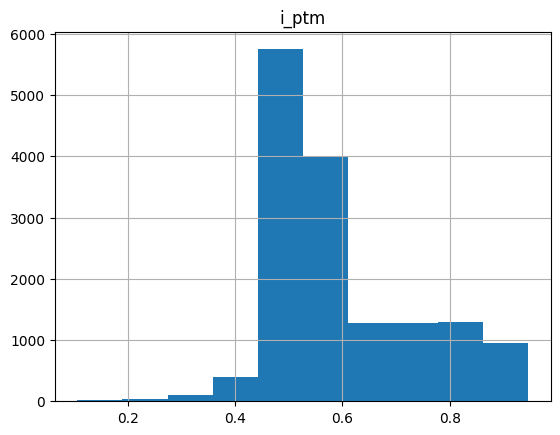

In [4]:
results.hist('i_ptm')

array([[<Axes: title={'center': 'i_pae'}>]], dtype=object)

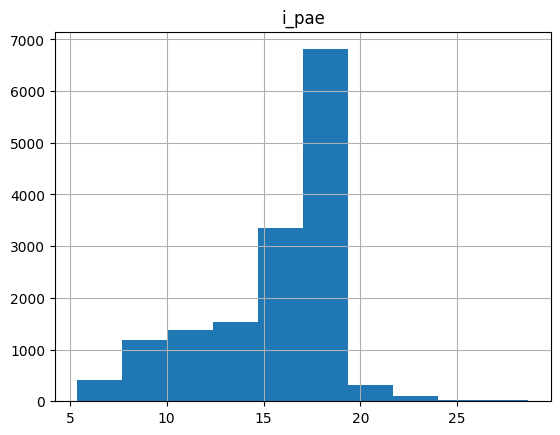

In [5]:
results.hist('i_pae')

In [6]:
# # Filter top sequences by structural confidence
# filtered = results[
#     (results['plddt'] > 0.8) &
#     (results['ptm'] > 0.05) &
#     (results['pae'] < 5.0) &
#     (results['rmsd'] < 2.0)
# ].sort_values(by='plddt', ascending=False)

# print(filtered[['seq', 'plddt', 'ptm', 'pae', 'rmsd', 'mpnn']].head(10))


In [7]:
results['epitope'] = results['seq'].apply(lambda x: x.split("/")[1])
results['length'] = results['epitope'].apply(lambda x: len(x))

In [8]:
results.sort_values(by='plddt', ascending=False)

,design,n,mpnn,plddt,i_ptm,i_pae,rmsd,seq,RUN,epitope,length
13979,0,0,1.339388,0.922469,0.939850,5.715950,14.813799,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,/clusterfs/nilah/sergio/RFdifussion/7RTD,SQAPVVAI,8
3033,0,18,0.697885,0.918757,0.946168,5.704641,0.819085,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,/clusterfs/nilah/sergio/RFdifussion/7RTD,SSLPPVIPAA,10
7670,0,0,0.694137,0.911740,0.945743,5.803148,0.692851,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,/clusterfs/nilah/sergio/RFdifussion/7RTD,SSLPPPVQI,9
3029,0,0,0.648532,0.909885,0.939021,5.816149,0.835604,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,/clusterfs/nilah/sergio/RFdifussion/7RTD,SSLPPVVPAF,10
3032,0,14,0.670814,0.909829,0.936882,5.915123,0.805759,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,/clusterfs/nilah/sergio/RFdifussion/7RTD,SALPPVVPAF,10
...,...,...,...,...,...,...,...,...,...,...,...
14256,0,29,1.428375,0.157448,0.132316,26.735244,47.472618,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,/clusterfs/nilah/sergio/RFdifussion/7RTD,YKETFSTVRLE,11
9712,0,20,1.246313,0.150713,0.161905,26.011627,27.471037,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,/clusterfs/nilah/sergio/RFdifussion/7RTD,MRSTAEAE,8
3703,0,2,1.384458,0.148197,0.146280,26.249206,37.866947,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,/clusterfs/nilah/sergio/RFdifussion/7RTD,GTRATGEV,8
653,0,2,1.213150,0.147783,0.153149,25.900809,15.124124,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,/clusterfs/nilah/sergio/RFdifussion/7RTD,SRELTVVE,8


In [9]:
results = results.drop_duplicates('epitope')

<Axes: xlabel='length', ylabel='plddt'>

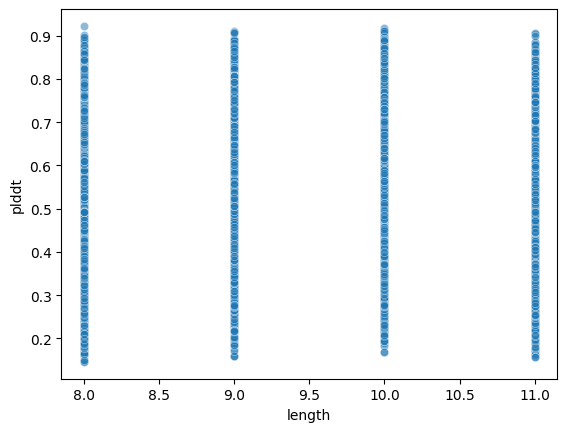

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.scatterplot(data=results, x='length', y='plddt', alpha=0.5)

<Axes: >

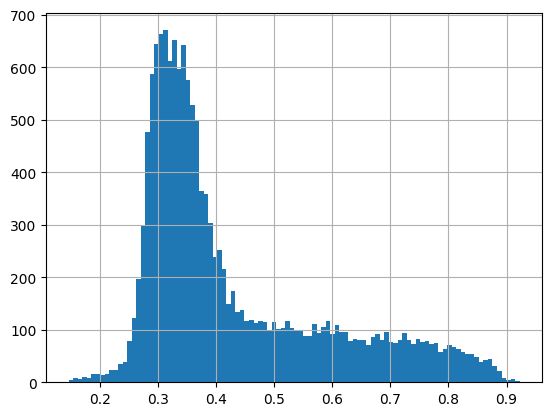

In [11]:
results['plddt'].hist(bins=100)

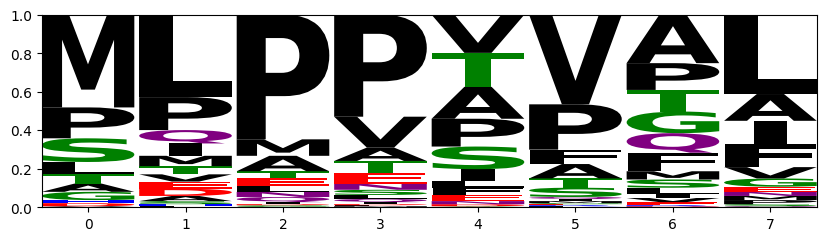

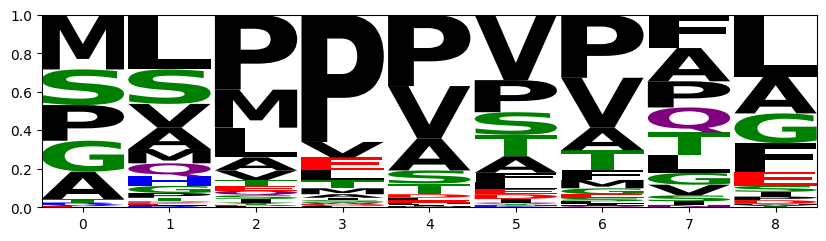

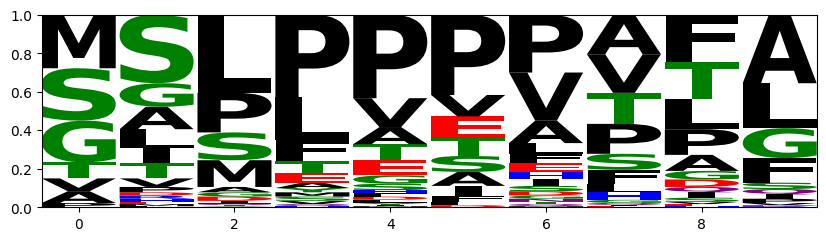

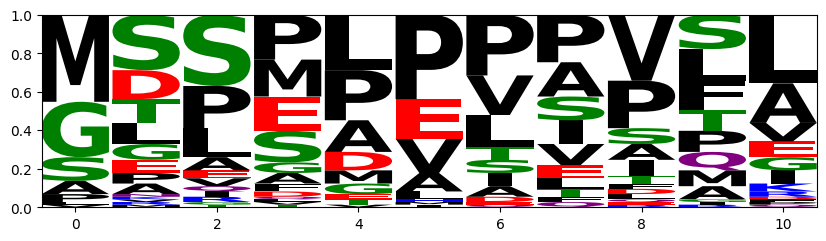

In [12]:
import numpy as np

for n in range(8, 12):

    seq_length = n

    sequences = results[(results['epitope'].str.len() == seq_length) & (results['plddt'] > 0.8)]['epitope'].tolist()

    # Create a list of amino acids (standard 20 amino acids)
    amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

    freq_matrix = np.zeros((seq_length, len(amino_acids)))

    # Populate the frequency matrix: count occurrences of each amino acid at each position
    for seq in sequences:
        for i, aa in enumerate(seq):
            aa_index = amino_acids.index(aa)
            freq_matrix[i, aa_index] += 1

    # Normalize the frequency matrix to get probabilities (frequencies sum to 1 at each position)
    freq_matrix = freq_matrix / len(sequences)

    # Create a DataFrame for logomaker
    freq_df = pd.DataFrame(freq_matrix, columns=amino_acids)

    # Generate the sequence logo
    logo = logomaker.Logo(freq_df, color_scheme='chemistry') #, font_name='Arial Rounded MT Bold')


In [13]:
results = results.iloc[:, 1:]

In [14]:
# results.to_csv('./HLAA0201_PDB_7RTD_RFdiffusion_sequences.csv', index=False)

Name | What it captures | Threshold (after ≤ 5 Å cutoff) | hotspot = "…", ready to copy
core_hotspot | Only the strongest binding hot‑spots—absolute core you almost never want to mutate. |  ≥ 4 distinct protein contacts | "A66,A70,A159"
high_contact | Core + secondary hubs. Good default when you want to preserve the bulk of the binding energy. |  ≥ 3 contacts | "A66,A70,A73,A77,A97,A147,A159"
medium_contact | Moderately important residues; nice to keep fixed if you want a very native‑like interface. |  = 2 contacts | "A7,A63,A99,A116,A143,A146,A155,A156"
low_contact | Peripheral/edge residues; usually safe to let RFdiffusion mutate for better packing/solubility. |  = 1 contact | "A5,A9,A33,A45,A59,A67,A69,A76,A80,A81,A84,A95,A114,A123,A124,A142,A152,A160,A163,A167,A171"
combo_high_low | Lock the high‑energy core while leaving medium residues flexible (high + low combined). | see above | "A5,A9,A33,A45,A59,A66,A67,A69,A70,A73,A76,A77,A80,A81,A84,A95,A97,A114,A123,A124,A142,A147,A152,A159"
all_contacts | Every chain‑A residue that has ≥ 1 heavy‑atom within 5 Å of chain C (36 total). Use to freeze the entire native interface. |  ≥ 1 contact | "A5,A7,A9,A33,A45,A59,A63,A66,A67,A69,A70,A73,A76,A77,A80,A81,A84,A95,A97,A99,A114,A116,A123,A124,A142,A143,A146,A147,A152,A155,A156,A159,A160,A163,A167,A171"
user_hotspot | Your original 9‑residue list. | (user‑defined) | "A7,A9,A59,A63,A66,A70,A99,A159,A167"

In [15]:
# Base directory
base_dir = '/global/scratch/users/sergiomar10/benchmark/RFD_BENCHMARK'

# List all files and filter for CSV and XLS
all_files = glob.glob(os.path.join(base_dir, '*'))
data_files = [f for f in all_files if f.lower().endswith(('.csv', '.xls'))]

# Display the list of data files
for f in data_files:
    print(f)

# Read each file into a DataFrame
dfs = {}
for f in data_files:
    name = os.path.basename(f)
    if f.lower().endswith('.csv'):
        dfs[name] = pd.read_csv(f)
    else:  # .xls tab-delimited
        dfs[name] = pd.read_csv(f, sep='\t', header=1)

print("\nLoaded DataFrames:")
for name, df in dfs.items():
    print(f"{name}: {df.shape} rows, {df.shape[1]} columns")


/global/scratch/users/sergiomar10/benchmark/RFD_BENCHMARK/B0801_epitope-B0801_umap.csv
/global/scratch/users/sergiomar10/benchmark/RFD_BENCHMARK/all_binders_B5101_netmhc.xls
/global/scratch/users/sergiomar10/benchmark/RFD_BENCHMARK/A3001all_binders_mhc_flurry.csv
/global/scratch/users/sergiomar10/benchmark/RFD_BENCHMARK/B3801RS_RFD_MAC__mhc_flurry.csv
/global/scratch/users/sergiomar10/benchmark/RFD_BENCHMARK/B4402RS_RFD_MAC__mhc_flurry.csv
/global/scratch/users/sergiomar10/benchmark/RFD_BENCHMARK/A3001RS_RFD_MAC__mhc_flurry.csv
/global/scratch/users/sergiomar10/benchmark/RFD_BENCHMARK/B3901RS_RFD_MAC__mhc_flurry.csv
/global/scratch/users/sergiomar10/benchmark/RFD_BENCHMARK/B3801all_binders_mhc_flurry.csv
/global/scratch/users/sergiomar10/benchmark/RFD_BENCHMARK/A0101_HLA-A0101_umap.csv
/global/scratch/users/sergiomar10/benchmark/RFD_BENCHMARK/B4402_HLA-B4402_umap.csv
/global/scratch/users/sergiomar10/benchmark/RFD_BENCHMARK/A3101all_binders_mhc_flurry.csv
/global/scratch/users/sergioma

/tmp/ipykernel_2617801/1854007633.py:17: DtypeWarning: Columns (62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[name] = pd.read_csv(f)



Loaded DataFrames:
B0801_epitope-B0801_umap.csv: (23552, 4) rows, 4 columns
all_binders_B5101_netmhc.xls: (44, 11) rows, 11 columns
A3001all_binders_mhc_flurry.csv: (10, 7) rows, 7 columns
B3801RS_RFD_MAC__mhc_flurry.csv: (5012, 7) rows, 7 columns
B4402RS_RFD_MAC__mhc_flurry.csv: (52615, 7) rows, 7 columns
A3001RS_RFD_MAC__mhc_flurry.csv: (4510, 7) rows, 7 columns
B3901RS_RFD_MAC__mhc_flurry.csv: (4512, 7) rows, 7 columns
B3801all_binders_mhc_flurry.csv: (12, 7) rows, 7 columns
A0101_HLA-A0101_umap.csv: (61126, 4) rows, 4 columns
B4402_HLA-B4402_umap.csv: (52615, 4) rows, 4 columns
A3101all_binders_mhc_flurry.csv: (8, 7) rows, 7 columns
A3101RS_RFD_MAC__mhc_flurry.csv: (3508, 7) rows, 7 columns
RS_RFD_MAC__B3801_netmhc.xls: (21042, 11) rows, 11 columns
B1801all_binders_mhc_flurry.csv: (2499, 7) rows, 7 columns
A0206RS_RFD_MAC__mhc_flurry.csv: (2692, 7) rows, 7 columns
A0201_epitope-A0201_umap.csv: (14808, 4) rows, 4 columns
RS_RFD_MAC__A2601_netmhc.xls: (19567, 11) rows, 11 columns
RS

In [16]:
HLA_athena = pd.read_csv('/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/performances/predictions_20250423.204321.tsv', sep = '\t')
HLA_athena

,pep,len,model_A0201,MSi_A0201,prank.MSi_A0201,best.MSi,best.MSi_allele,assign.MSi_scores,assign.MSi_allele
0,GMLPAPPL,8,panpan,0.775238,1.557303,0.775238,A0201,0.775238,A0201
1,VRESPEVT,8,panpan,0.008188,32.050964,0.008188,A0201,NaN,unknown
2,PTMTPAPP,8,panpan,0.010776,29.219358,0.010776,A0201,NaN,unknown
3,PVSLPAPP,8,panpan,0.053162,15.628531,0.053162,A0201,NaN,unknown
4,SSLIVVPG,8,panpan,0.058255,14.988930,0.058255,A0201,NaN,unknown
...,...,...,...,...,...,...,...,...,...
449,MEVEVHLEEV,10,specific,0.072925,8.994611,0.072925,A0201,NaN,unknown
450,MEVEVHQEES,10,specific,0.001466,40.621932,0.001466,A0201,NaN,unknown
451,KTVIELEFEE,10,specific,0.001355,41.583250,0.001355,A0201,NaN,unknown
452,AAMQIDTEPL,10,specific,0.102611,7.496536,0.102611,A0201,0.102611,A0201


In [17]:
# # 1) Extract your four DataFrames from the `dfs` dict:
# df_eval_hla = dfs['evaluation_A0201HLA-highbinders_mhcflurry_unique.csv']
# df_eval_epi = dfs['evaluation_A0201epitope-highbinders_mhcflurry_unique.csv']
# df_mhc      = dfs['A0201highbinders_mhc_flurry.csv']
# df_net      = dfs['highbinders_A0201_netmhc.xls']
# def_ath = HLA_athena

# # 2) Rename the key columns so they all join on “sequence”
# df_mhc = df_mhc.rename(columns={
#     'peptide': 'sequence',
#     'affinity': 'mhcflurry_affinity'
# })
# df_net = df_net.rename(columns={
#     'Peptide': 'sequence',
#     'BA_Rank': 'netmhc_rank'
# })

# # 3) Rename the two prediction columns so they don’t collide
# df_hla = df_eval_hla[['sequence','prediction']].rename(
#     columns={'prediction': 'pred_hla'}
# )
# df_epi = df_eval_epi[['sequence','prediction']].rename(
#     columns={'prediction': 'pred_epitope'}
# )

# def_ath = def_ath.rename(columns={
#     'pep': 'sequence'
# })


# # 4) Chain them together in one pipeline
# df_merged = (
#     df_hla
#       .merge(df_epi, on='sequence', how='left')                        # add epitope‐encoded preds
#       .merge(df_mhc[['sequence','mhcflurry_affinity']], on='sequence', how='left')
#       .merge(df_net[['sequence','netmhc_rank']],          on='sequence', how='left')
#       .merge(def_ath[['sequence','prank.MSi_A0201']],          on='sequence', how='left')
# )

# # 5) Inspect
# print(df_merged.shape)
# print(df_merged.head())


# df_merged['mhcflurry_affinity'] = df_merged['mhcflurry_affinity'].apply(np.log10)
# df_merged['netmhc_rank'] = df_merged['netmhc_rank'].apply(np.log10)

# # 1) Melt for violin plotting
# df_long = df_merged.melt(
#     id_vars=['sequence'],
#     value_vars=['pred_hla','pred_epitope','mhcflurry_affinity','netmhc_rank'],
#     var_name='Model',
#     value_name='Value'
# )

In [18]:
# # 1) Extract your four DataFrames from the `dfs` dict:
# df_eval_hla = dfs['evaluation_A0201HLA-lowbinders_mhcflurry_unique.csv']
# df_eval_epi = dfs['evaluation_A0201epitope-lowbinders_mhcflurry_unique.csv']
# df_mhc      = dfs['A0201lowbinders_mhc_flurry.csv']
# df_net      = dfs['lowbinders_A0201_netmhc.xls']

# # 2) Rename the key columns so they all join on “sequence”
# df_mhc = df_mhc.rename(columns={
#     'peptide': 'sequence',
#     'affinity': 'mhcflurry_affinity'
# })
# df_net = df_net.rename(columns={
#     'Peptide': 'sequence',
#     'BA_Rank': 'netmhc_rank'
# })

# # 3) Rename the two prediction columns so they don’t collide
# df_hla = df_eval_hla[['sequence','prediction']].rename(
#     columns={'prediction': 'pred_hla'}
# )
# df_epi = df_eval_epi[['sequence','prediction']].rename(
#     columns={'prediction': 'pred_epitope'}
# )

# # 4) Chain them together in one pipeline
# df_merged_low = (
#     df_hla
#       .merge(df_epi, on='sequence', how='left')                        # add epitope‐encoded preds
#       .merge(df_mhc[['sequence','mhcflurry_affinity']], on='sequence', how='left')
#       .merge(df_net[['sequence','netmhc_rank']],          on='sequence', how='left')
# )

# # 5) Inspect
# print(df_merged_low.shape)
# print(df_merged_low.head())

# df_merged_low['mhcflurry_affinity'] = df_merged_low['mhcflurry_affinity'].apply(np.log10)
# df_merged_low['netmhc_rank'] = df_merged_low['netmhc_rank'].apply(np.log10)

# # 1) Melt for violin plotting
# df_long2 = df_merged_low.melt(
#     id_vars=['sequence'],
#     value_vars=['pred_hla','pred_epitope','mhcflurry_affinity','netmhc_rank'],
#     var_name='Model',
#     value_name='Value'
# )

In [19]:
# df_merged_combined = pd.concat([df_merged_low, df_merged])
# df_long2['Binders'] = 'Plddt < 0.2'
# df_long['Binders'] = 'Plddt > 0.8'
# df_long_plot = pd.concat([df_long, df_long2])
# model_map = {
#     'pred_hla':            'ESMCBA (HLA)',
#     'pred_epitope':        'ESMCBA (Epitope)',
#     'mhcflurry_affinity':  'MHCflurry',
#     'netmhc_rank':         'NetMHCpan'
# }
# df_long_plot['Model'] = df_long_plot['Model'].map(model_map)
# add_plot_df = pd.merge(df_long_plot, results, left_on='sequence', right_on='epitope', how='left')

In [20]:
# # sns.scatterplot(data=add_plot_df, x='plddt', y='Value', hue='Model', alpha=0.5)
# sns.scatterplot(data=add_plot_df, x='i_ptm', y='Value', hue='Model', alpha=0.5)
# sns.scatterplot(data=add_plot_df, x='mpnn', y='Value', hue='Model', alpha=0.5)
# sns.scatterplot(data=add_plot_df, x='i_pae', y='Value', hue='Model', alpha=0.5)
# sns.scatterplot(data=add_plot_df, x='mpnn', y='Value', hue='Model', alpha=0.5)
# add_plot_df[add_plot_df['plddt'] > 0.8]
# sns.scatterplot(data=add_plot_df[add_plot_df['plddt'] > 0.85], x='plddt', y='Value', hue='Model', alpha=0.5)
# add_plot_df[add_plot_df['plddt'] < 0.1]
# sns.scatterplot(data=add_plot_df[add_plot_df['plddt'] < 0.2], x='plddt', y='Value', hue='Model', alpha=0.5)
# from scipy.stats import mannwhitneyu

# median_table = (
#     df_long_plot
#     .groupby(["Model", "Binders"])["Value"]
#     .median()
#     .reset_index(name="median_Value")
# )

# # 2) Compute p-values per Model (high vs low confidence)
# pvals = []
# for model in df_long_plot["Model"].unique():
#     dfm = df_long_plot[df_long_plot["Model"] == model]
#     grp_high = dfm[dfm["Binders"] == "Plddt > 0.8"]["Value"]
#     grp_low  = dfm[dfm["Binders"] != "Plddt > 0.8"]["Value"]  # adjust label if needed
#     if len(grp_high) > 0 and len(grp_low) > 0:
#         stat, p = mannwhitneyu(grp_high, grp_low, alternative="two-sided")
#     else:
#         p = float("nan")
#     pvals.append({"Model": model, "p_value": p})

# pvals_df = pd.DataFrame(pvals)

# # Merge p-values into median table
# median_with_p = median_table.merge(pvals_df, on="Model")
# print("Median predicted values and p-values by Model and Binders:")
# # print(median_with_p )

# # 3) Violin plot with p-value annotations
# sns.set_style("white")
# fig, ax = plt.subplots(figsize=(10, 6))
# sns.violinplot(
#     x="Model", y="Value",
#     data=df_long_plot,
#     ax=ax,
#     hue="Binders",
#     inner="quartile"
# )

# # Annotate p-values
# models = df_long_plot["Model"].unique()
# y_max = df_long_plot["Value"].max()
# y_min = df_long_plot["Value"].min()
# y_range = y_max - y_min

# for i, model in enumerate(models):
#     p = pvals_df.loc[pvals_df["Model"] == model, "p_value"].iloc[0]
#     p = p * 4 
#     ax.text(
#         i, 
#         y_max + 0.05 * y_range, 
#         f"p = {p:.2e}", 
#         ha="center", 
#         va="bottom", 
#         fontsize=10
#     )

# ax.set_xlabel("Model", fontsize=12)
# ax.set_ylabel("Predicted Score / Affinity / Rank", fontsize=12)
# ax.set_title("Evaluation of Structure-guided epitopes for MHC I Binding in HLA-A*02:01", fontsize=14)
# plt.xticks(rotation=30)
# plt.tight_layout()
# plt.show()

# df_merged = pd.merge(df_merged_combined, results, left_on='sequence', right_on='epitope', how='left')
# sns.scatterplot(data = df_merged, x = 'mpnn', y = 'pred_epitope', hue = 'length')
# # sns.scatterplot(data = df_merged, x = 'mpnn', y = 'mhcflurry_affinity')
# plt.show()
# sns.scatterplot(data = df_merged, x = 'mpnn', y = 'mhcflurry_affinity', hue = 'length')
# plt.show()

# # 3) Sequence logos for high- vs low-confidence epitopes
# # Assuming df_sequences contains sequences and Binders category includes '< 0.2'
# # Here, simulate both groups for demonstration:
# df_sequences = df_long_plot.copy()
# df_sequences.loc[df_sequences.index[-1], 'Binders'] = 'Plddt < 0.2'  # simulate a low-confidence

# lengths = [8, 9, 10, 11]
# binders = df_sequences['Binders'].unique()

# # 3) Create a grid of logos: rows = lengths, cols = binders
# fig, axes = plt.subplots(len(lengths), len(binders),
#                          figsize=(4*len(binders), 3*len(lengths)),
#                          sharex=True, sharey=True)

# for i, length in enumerate(lengths):
#     for j, binder in enumerate(binders):
#         ax = axes[i, j]
#         # Filter for the exact length and binder type
#         seqs = df_sequences[
#             (df_sequences['Binders'] == binder) &
#             (df_sequences['sequence'].str.len() == length)
#         ]['sequence'].tolist()

#         if not seqs:
#             ax.axis('off')
#             continue

#         # Build counts & convert to frequency
#         counts = logomaker.alignment_to_matrix(seqs, to_type='counts')
#         freq = counts.div(counts.sum(axis=1), axis=0)

#         # Plot logo
#         logo = logomaker.Logo(freq, ax=ax, color_scheme='chemistry') 
#         ax.set_title(f"{length}-mer ({binder})")
#         ax.set_xlabel("Position")
#         ax.set_ylabel("Frequency")

# plt.tight_layout()
# plt.show()
# # print(df_long_plot['sequence'].unique()) xs

In [21]:
import requests

# List of PDB IDs
pdb_ids = """
1HSB,1SYV,1YDP,1ZVS,3HG1,3KPN,3KPO,3KYN,3KYO,3O4L,3OX8,3OXR,3OXS,3TO2,3VFM,3VFN,3VFO,
3VFP,3VFR,3VFS,3VFT,3VFU,3VFV,3VFW,4GKN,4HX1,4JRX,4JRY,4PRA,4PRB,4PRD,4PRE,4PRH,4PRI,
4PRP,5DEG,5NQ1,5NQ3,5VVP,5VWD,5VWF,6BXQ,6GGM,6GH1,6GH4,6GL1,6ID4,6IEX,6J2E,6K7T,6MTL,
6O4Y,6O4Z,6O51,6O53,6P2S,6P64,6TDO,6TDP,6TDQ,6TDR,6TDS,6TMO,6TRN,6TRO,6UJO,6UJQ,6UK2,
6UK4,6UZM,6UZN,6UZO,6UZP,6UZQ,6UZS,6V2O,6VB0,6VB1,6VB2,6VB3,6VB4,6VB5,6VB6,6VB7,6VIU,
6VPZ,6VQ2,6VQD,6VQE,6VQO,6VQY,6VQZ,6VR1,6VR5,6VRM,6VRN,6W51,6XQA,6Y26,6Y28,6Y2A,6Z9V,
6Z9W,6Z9X,7BBG,7CIQ,7CIR,7CIS,7DUU,7DYN,7DZM,7DZN,7EDO,7EJL,7EJM,7EJN,7EU2,7F4W,7JYU,
7JYV,7JYW,7JYX,7K80,7K81,7KGO,7KGP,7KGQ,7KGR,7KGS,7KGT,7LG2,7LG3,7MJ6,7MJ7,7MJ8,7MJ9,
7MKB,7N6D,7N6E,7NMD,7NME,7NMF,7NMG,7OW3,7OW4,7OW5,7OW6,7P3D,7P3E,7PB2,7PBC,7PBE,7PDW,
7Q98,7Q99,7Q9A,7Q9B,7QPJ,7R7V,7R7W,7R7X,7R7Y,7R80,7RE7,7SA2,7SIF,7SIG,7SIH,7SU9,7T0L,
7T5M,7WKJ,7WT3,7WT4,7WT5,7WZZ,7X00,7XF3,7YG3,7ZUC,8CX4,8E13,8E8I,8EC5,8EK5,8EMF,8EMG,
8EMI,8EMJ,8EMK,8EN8,8ENH,8EO8,8ES8,8ES9,8FJA,8FJB,8GOM,8GON,8GVB,8GVG,8GVI,8HN4,8ISN,
8RJ5,8RJH,8RJI,8RNG,8RNH,8ROO,8ROP,8RYN,8RYQ,8SBK,8SBL,8T6M,8V4Z,8WUL,8YIV,8YZR,8YZW,
8YZZ,8Z06,8Z07,8Z08,8ZV9,9BL5,9BL6,9BL9,9BLA,9C96,9GV6,9GV7,9L47,9L48,9L49,9L4A
""".replace("\n", "").split(",")

# Output directory
output_dir = "/clusterfs/nilah/sergio/RFdifussion/structures/pdb_files"
os.makedirs(output_dir, exist_ok=True)

# Download loop
for pdb_id in pdb_ids:
    pdb_id = pdb_id.strip().lower()
    output_file = os.path.join(output_dir, f"{pdb_id}.pdb")
    
    if os.path.exists(output_file):
        print(f"⏭️  Skipping {pdb_id.upper()} (already exists)")
        continue

    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)
    if response.status_code == 200:
        with open(output_file, "w") as f:
            f.write(response.text)
        print(f"✅ Downloaded {pdb_id.upper()}")
    else:
        print(f"❌ Failed to download {pdb_id.upper()}")

print("🏁 Finished downloading all PDBs.")


⏭️  Skipping 1HSB (already exists)
⏭️  Skipping 1SYV (already exists)
⏭️  Skipping 1YDP (already exists)
⏭️  Skipping 1ZVS (already exists)
⏭️  Skipping 3HG1 (already exists)
⏭️  Skipping 3KPN (already exists)
⏭️  Skipping 3KPO (already exists)
⏭️  Skipping 3KYN (already exists)
⏭️  Skipping 3KYO (already exists)
⏭️  Skipping 3O4L (already exists)
⏭️  Skipping 3OX8 (already exists)
⏭️  Skipping 3OXR (already exists)
⏭️  Skipping 3OXS (already exists)
⏭️  Skipping 3TO2 (already exists)
⏭️  Skipping 3VFM (already exists)
⏭️  Skipping 3VFN (already exists)
⏭️  Skipping 3VFO (already exists)
⏭️  Skipping 3VFP (already exists)
⏭️  Skipping 3VFR (already exists)
⏭️  Skipping 3VFS (already exists)
⏭️  Skipping 3VFT (already exists)
⏭️  Skipping 3VFU (already exists)
⏭️  Skipping 3VFV (already exists)
⏭️  Skipping 3VFW (already exists)
⏭️  Skipping 4GKN (already exists)
⏭️  Skipping 4HX1 (already exists)
⏭️  Skipping 4JRX (already exists)
⏭️  Skipping 4JRY (already exists)
⏭️  Skipping 4PRA (a

In [22]:
# Prepare list for metadata
meta_list = []

for pdb in pdb_ids:
    pdb = pdb.strip().lower()
    url = f"https://data.rcsb.org/rest/v1/core/entry/{pdb}"
    try:
        r = requests.get(url)
        if r.status_code != 200:
            raise ValueError(f"Status {r.status_code}")
        data = r.json()
        
        meta = {
            "pdb_id": pdb.upper(),
            "title": data.get("struct", {}).get("title", ""),
            "method": data.get("exptl", [{}])[0].get("method", ""),
            "resolution": data.get("rcsb_entry_info", {}).get("resolution_combined", [None])[0],
            "release_date": data.get("rcsb_accession_info", {}).get("initial_release_date", ""),
            "revision_date": data.get("rcsb_accession_info", {}).get("revision_date", "")
        }
        meta_list.append(meta)
    except Exception as e:
        meta_list.append({
            "pdb_id": pdb.upper(),
            "title": None, "method": None,
            "resolution": None,
            "release_date": None,
            "revision_date": None
        })

# Build DataFrame and display
df_meta = pd.DataFrame(meta_list)
df_meta.to_csv('metadata.csv', index=False)

In [23]:
import re
from typing import Optional            # <-- add this

def grab_hla(title: str) -> Optional[str]:   # <- use Optional[str] instead of str | None
    """
    Return the first HLA allele in *title* or None.
    Handles:  HLA-A*02:01,  HLA-A02:01,  HLA-A*0201,  HLA-A0201
    """
    patterns = [
        r'(HLA-[A-Z]\*\d{2}:\d{2})',   # HLA-A*02:01
        r'(HLA-[A-Z]\d{2}:\d{2})',     # HLA-A02:01
        r'([A-Z]\*\d{4})',         # HLA-A*0201
        r'(-[A-Z]\*\d{2}:\d{2})'  ,
        r'([A-Z]\d{2}\d{2})'  ,
        r'([A-Z]\*\d{2}:\d{2})' ,
        r'(-[A-Z]\d{1}:\d{2})'  ,
        r'(-[A-Z]\d{1})'   ,
        r'(-[A-Z]\d{2})'            # HLA-A0201
    ]
    for p in patterns:
        m = re.search(p, title, flags=re.IGNORECASE)
        if m:
            return m.group(1).upper()
    return None


# ------------------------------------------------------------------
# Apply to your DataFrame
# ------------------------------------------------------------------
df_meta_cp        = df_meta.copy()
df_meta_cp['HLA'] = df_meta_cp['title'].apply(grab_hla)

# Rows where an allele was detected
df_hla = df_meta_cp[df_meta_cp['HLA'].notna()][['pdb_id', 'HLA']]

# If you still need the original metadata columns:
df_hla = df_hla.merge(df_meta, on='pdb_id', how='right')
df_hla[~(df_hla['HLA'].notna()) ]['title'].str.split('HLA', expand = True)[1].unique()

array(['-AW68 SIMILARLY AT THEIR ENDS BUT BULGE OUT IN THE MIDDLE', '-G',
       None, '-G presenting KGPPAALTL peptide',
       '-G presenting KLPAQFYIL peptide', ' A2*01-AVYDGREHTV',
       ' A2*01-GVYDGREHTV', ' molecule with an KIR receptor',
       ' peptide complex', '-A*02', '*B27', ''], dtype=object)

In [24]:
df_hla['hla_allele'] = df_hla['HLA'].str.replace('HLA','').str.replace('-','').str.replace(':','').str.replace('*','')

In [25]:
[print(x.replace('HLA-','')  +',')for x in df_hla[df_hla['hla_allele'].str.len() > 2]['HLA'].unique()]

B*4405,
B*4403,
A*02:03,
A*02:06,
A*02:07,
A*0201,
B*3508,
B*3505,
B*35:01,
B*35:08,
B*27:06,
B*57:03,
B*58:03,
B*57:01,
E*01:03,
A*11:01,
B*4001,
-N*01:01,
B*44:05,
-A2:01,
A0201,
A*02:01,
B*15:02,
B*15:01,
B*27:05,
A*2402,
B2705,
B8101,
B4201,
A2402,
A*24:02,
B*5301,
B*5701,
B*3501,
B*3503,
A*2450,
B5801,
B*1501,
B*13:01,
A24:02,
N4554,
N4542,
N6972,
M3134,
T1006,
B*18:01,
C*12:03,
C*12:02,


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [26]:
# sns.set_style("white")

# # Create figure
# plt.figure(figsize=(8, 4))
# sns.histplot(df_hla['hla_allele'], bins=len(df_hla['hla_allele'].unique()), edgecolor='black')

# # Aesthetics
# plt.xticks(rotation=45, ha='right')
# plt.xlabel('HLA Alleles', fontsize=12)
# plt.ylabel('Count of Protein Structures', fontsize=12)
# plt.tight_layout()
# sns.despine()  # remove top and right spines

# output_dir = '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/figures/'
# os.makedirs(output_dir, exist_ok=True)
# # output_path = os.path.join(output_dir, f'PDBCOUNTS.pdf')
# plt.savefig(output_path, bbox_inches='tight')

# plt.show()


In [27]:
import sys, os, json, textwrap, itertools, requests
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser, NeighborSearch, is_aa
from Bio.Data.IUPACData import protein_letters_3to1

AA3 = {k.upper(): v for k, v in protein_letters_3to1.items()}

def three_to_one(resname: str) -> str:
    return AA3.get(resname.upper(), "X")

def peptide_sequence(chain):
    res = [r for r in chain if is_aa(r) and r.id[0] == " "]
    return "".join(three_to_one(r.resname) for r in res)

def fetch_pdb_metadata(pdb_ids, max_res=2.8):
    rows = []
    for pdb in pdb_ids:
        url = f"https://data.rcsb.org/rest/v1/core/entry/{pdb.lower()}"
        try:
            r = requests.get(url, timeout=15)
            r.raise_for_status()
            d = r.json()
            rows.append(
                dict(
                    pdb_id        = pdb.upper(),
                    title         = d.get("struct", {}).get("title", ""),
                    method        = d.get("exptl", [{}])[0].get("method", ""),
                    resolution    = d.get("rcsb_entry_info", {})
                                   .get("resolution_combined", [np.nan])[0],
                    release_date  = d.get("rcsb_accession_info", {})
                                   .get("initial_release_date", ""),
                )
            )
        except Exception as e:
            print("⚠️ metadata failed for", pdb, e)
    meta = pd.DataFrame(rows)
    return meta[meta["resolution"] <= max_res]

from tqdm.auto import tqdm          

def extract_contacts(
        pdb_dir: Path,
        pdb_ids,
        cut_max: float = 10.0,
        show_progress: bool = True
    ):
    """
    Parse each PDB file and collect heavy-atom epitope↔MHC contacts ≤ cut_max Å.

    Parameters
    ----------
    pdb_dir : Path
        Directory containing local .pdb files.
    pdb_ids : iterable[str]
        List/Series of PDB IDs (uppercase).
    cut_max : float, default 10.0
        Maximum neighbor distance to record (Å).
    show_progress : bool, default True
        Wrap iterator in tqdm for a progress bar.

    Returns
    -------
    pd.DataFrame
        One row per atom-atom neighbor with columns:
        pdb_id, ep_chain, ep_resnum, ep_resname,
        mhc_chain, mhc_resnum, mhc_resname, min_distance, ep_seq
    """
    import pandas as pd 
    parser   = PDBParser(QUIET=True)
    contacts = []

    iterator = tqdm(pdb_ids, desc="Parsing PDBs", unit="struct") if show_progress else pdb_ids

    for pdb in iterator:
        fname = pdb_dir / f"{pdb.lower()}.pdb"
        if not fname.exists():
            continue
        try:
            struct = parser.get_structure(pdb, str(fname))[0]
        except Exception as e:
            tqdm.write(f"⚠️  parse failed for {pdb}: {e}")
            continue

        chains = list(struct.get_chains())
        lens   = {c.id: sum(1 for r in c if is_aa(r) and r.id[0] == " ") for c in chains}
        epi_ch = [c for c in chains if 7   <= lens[c.id] <= 15]   # peptide
        mhc_ch = [c for c in chains if 150 <= lens[c.id] <= 300]  # MHC heavy

        for epich, mhcch in itertools.product(epi_ch, mhc_ch):
            a_epi = [a for a in epich.get_atoms() if a.element != "H"]
            a_mhc = [a for a in mhcch.get_atoms() if a.element != "H"]
            ns    = NeighborSearch(a_epi + a_mhc)

            for atom in a_epi:
                for nb in ns.search(atom.coord, cut_max):
                    if nb not in a_mhc:
                        continue
                    res_epi, res_mhc = atom.get_parent(), nb.get_parent()
                    d = np.linalg.norm(atom.coord - nb.coord)
                    contacts.append(dict(
                        pdb_id       = pdb,
                        ep_chain     = epich.id,
                        ep_resnum    = res_epi.id[1],
                        ep_resname   = res_epi.resname,
                        mhc_chain    = mhcch.id,
                        mhc_resnum   = res_mhc.id[1],
                        mhc_resname  = res_mhc.resname,
                        min_distance = round(float(d), 2),
                        ep_seq       = peptide_sequence(epich)
                    ))

        contacts_df = pd.DataFrame(contacts)
        contacts_df.to_csv("mhc_epitope_contacts_15052025.csv", index=False)

    return pd.DataFrame(contacts)

pdb_dir   = Path("/clusterfs/nilah/sergio/RFdifussion/structures/pdb_files")
cutoffs   = [10]
outdir    = Path("analysis_out")

pdb_ids = [p.stem.upper() for p in pdb_dir.glob("*.pdb")]
meta    = fetch_pdb_metadata(pdb_ids)
# meta.to_csv(outdir/"dataset_meta.tsv", sep="\t", index=False)
meta.head()

,pdb_id,title,method,resolution,release_date
0,6UZN,HLA-B*15:02 complexed with a synthetic peptide,X-RAY DIFFRACTION,2.22,2020-11-18T00:00:00+0000
1,8SBK,Structure of HLA-A*24:02 in complex with pepti...,X-RAY DIFFRACTION,1.80,2023-12-06T00:00:00+0000
2,6Z9W,Human Class I Major Histocompatibility Complex...,X-RAY DIFFRACTION,2.70,2021-06-30T00:00:00+0000
3,7NMG,"Human MHC Class I, A24 Allele presenting LWM, ...",X-RAY DIFFRACTION,2.48,2022-09-07T00:00:00+0000
4,9GV6,Structure of TCR in complex with peptide-HLA,X-RAY DIFFRACTION,2.77,2025-04-23T00:00:00+0000


In [28]:
# %% 5 (OPTIONAL) redundancy filter
# If you have allele labels, deduplicate with allele+peptide columns here.
meta = meta.sort_values("resolution").drop_duplicates("pdb_id")  # keep all
meta.head()

,pdb_id,title,method,resolution,release_date
116,8ROP,Crystal structure of HLA B*18:01 in complex wi...,X-RAY DIFFRACTION,1.15,2024-05-08T00:00:00+0000
226,7R7W,Crystal structure of HLA-B*5301 complex with a...,X-RAY DIFFRACTION,1.17,2022-06-29T00:00:00+0000
62,6Y26,Crystal structure of HLA-B2705 complexed with ...,X-RAY DIFFRACTION,1.20,2020-12-23T00:00:00+0000
199,8EC5,Structures of HLA-B8E76C loaded with long pept...,X-RAY DIFFRACTION,1.22,2023-07-26T00:00:00+0000
118,6Y2A,Crystal structure of HLA-B2705 complexed with ...,X-RAY DIFFRACTION,1.25,2020-12-23T00:00:00+0000


In [29]:
# cutoffs   = [10]
# contacts = extract_contacts(pdb_dir, meta["pdb_id"], cut_max=max(cutoffs))
# contacts.to_csv("mhc_epitope_contacts_15052025.csv", index=False)
# contacts.head()

In [30]:
# contacts.drop_duplicates().to_csv('mhc_epitope_noduplicates_contacts_15052025.csv', index=False)

In [31]:
# contacts.to_csv(outdir/"mhc_epitope_contacts_08052025.csv", index=False)

In [32]:
contacts = pd.read_csv("/global/scratch/users/sergiomar10/ESMCBA/mhc_epitope_contacts_15052025.csv")

In [33]:
contacts = contacts.drop_duplicates()

In [34]:
1 - (contacts['min_distance'] < 3).mean() 
# 0.9983347773239745

0.9983347773239745

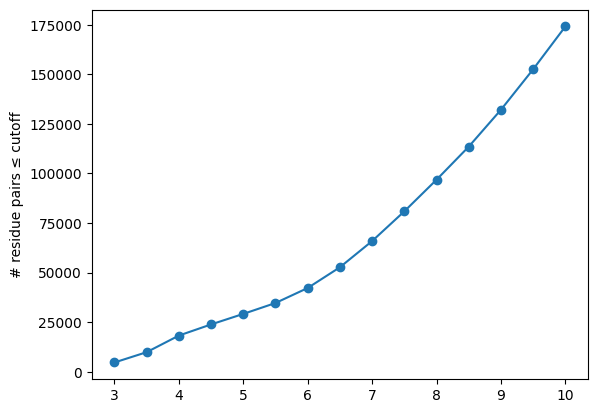

In [35]:
res_contacts = (contacts.groupby(["pdb_id","ep_chain","ep_resnum",
                                  "mhc_chain","mhc_resnum"])
                         ["min_distance"].min()
                         .reset_index())

cutoffs = np.arange(3, 10.5, 0.5)
cov = {c: (res_contacts.min_distance <= c).sum() for c in cutoffs}
cov_df = pd.Series(cov).sort_index()
cov_df.plot(marker="o")
plt.ylabel("# residue pairs ≤ cutoff")
plt.show()


In [36]:
for i in np.arange(1, 11, 0.5):
# percentage of residue pairs ≤ 3 Å
    pct3  = (res_contacts.min_distance <= i).mean() * 100
    
    print(f"≤{i} Å : {pct3:5.2f}%")

≤1.0 Å :  0.00%
≤1.5 Å :  0.00%
≤2.0 Å :  0.00%
≤2.5 Å :  0.15%
≤3.0 Å :  2.68%
≤3.5 Å :  5.67%
≤4.0 Å : 10.47%
≤4.5 Å : 13.70%
≤5.0 Å : 16.75%
≤5.5 Å : 19.91%
≤6.0 Å : 24.25%
≤6.5 Å : 30.26%
≤7.0 Å : 37.85%
≤7.5 Å : 46.45%
≤8.0 Å : 55.61%
≤8.5 Å : 65.19%
≤9.0 Å : 75.88%
≤9.5 Å : 87.60%
≤10.0 Å : 100.00%
≤10.5 Å : 100.00%


In [37]:
# # --- curvature / knee locator ---
# from scipy.interpolate import UnivariateSpline
# x, y = cov_df.cutoff.values, cov_df.n_pairs.values
# spl = UnivariateSpline(x, y, k=4, s=0)
# curv = spl.derivative(2)(x)            # second derivative ≈ curvature
# elbow_idx = np.argmax(curv)            # maximum curvature point
# elbow = x[elbow_idx]
# print(f"Elbow (max curvature) ≈ {elbow:.1f} Å")
# # Elbow (max curvature) ≈ 10.0 Å

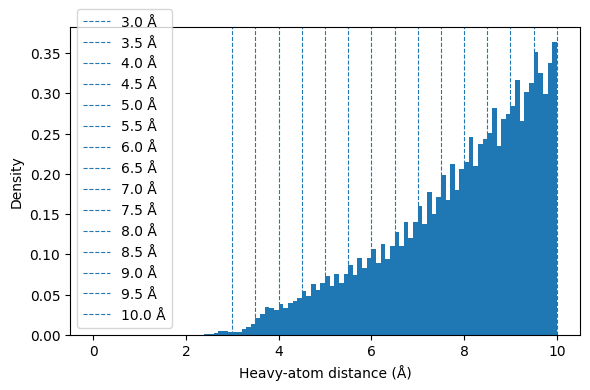

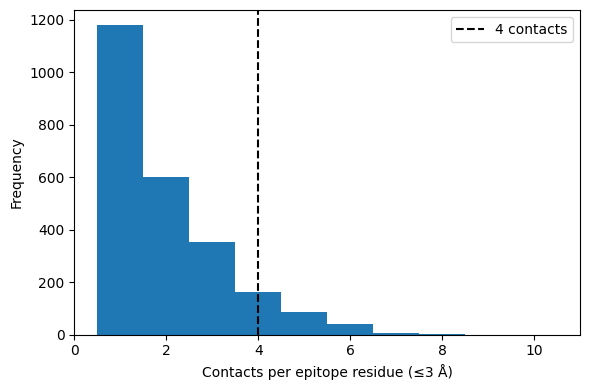

In [38]:
cov = {c: (contacts[contacts.min_distance<=c]
           .drop_duplicates(["pdb_id","ep_chain","ep_resnum"]).shape[0])
       for c in cutoffs}
# pd.Series(cov, name="unique_epitope_res").to_csv(
#     outdir/"cutoff_coverage.tsv", sep="\t"
# )
# pd.Series(cov)

# %% 8 Distance histogram
plt.figure(figsize=(6,4))
plt.hist(contacts["min_distance"], bins=np.arange(0, max(cutoffs)+0.1, 0.1),
         density=True)
for c in cutoffs:
    plt.axvline(c, ls="--", lw=0.8, label=f"{c} Å")
plt.xlabel("Heavy-atom distance (Å)")
plt.ylabel("Density"); plt.legend(); plt.tight_layout()
# plt.savefig(outdir/"distance_hist.png", dpi=300)

plt.show()
# %% 9 Contact-count distribution  (≤3 Å as example)
counts = (contacts[contacts.min_distance<=3]
          .groupby(["pdb_id","ep_chain","ep_resnum"]).size())
plt.figure(figsize=(6,4))
plt.hist(counts, bins=np.arange(1, counts.max()+2)-0.5, align="mid")
plt.axvline(4, ls="--", color="k", label="4 contacts")
plt.xlabel("Contacts per epitope residue (≤3 Å)")
plt.ylabel("Frequency"); plt.legend(); plt.tight_layout()
# plt.savefig(outdir/"contact_count_hist.png", dpi=300)
plt.show()

In [39]:
import numpy as np
d = contacts["min_distance"].to_numpy()

# thresholds every 0.5 Å
thr = np.arange(0.0, 10.5, 0.5)
cov = np.array([(d <= t).mean() for t in thr])

# increments from one 0.5 Å step to the next
inc = np.diff(cov)                         # fraction
inc_pct = 100 * inc                        # %


In [40]:
boot_cov5 = []
for _ in range(100):
    res = np.random.choice(d, size=d.size, replace=True)
    boot_cov5.append((res <= 5).mean())
ci5_low, ci5_high = np.percentile(boot_cov5, [2.5, 97.5])
print(f"95 % CI for ≤5 Å: {ci5_low*100:.2f}–{ci5_high*100:.2f} %")


95 % CI for ≤5 Å: 6.88–6.94 %


In [41]:
# # boot = []
# # for _ in range(1_000):
# #     resample = np.random.choice(contacts['min_distance'].values, size=contacts['min_distance'].values.size, replace=True)
# #     boot.append((resample <= 3.0).mean())
# ci_low, ci_high = np.percentile(boot, [2.5, 97.5])
# print(f"95 % CI: [{ci_low*100:.3f} %, {ci_high*100:.3f} %]")
# 95 % CI: [0.166 %, 0.175 %]

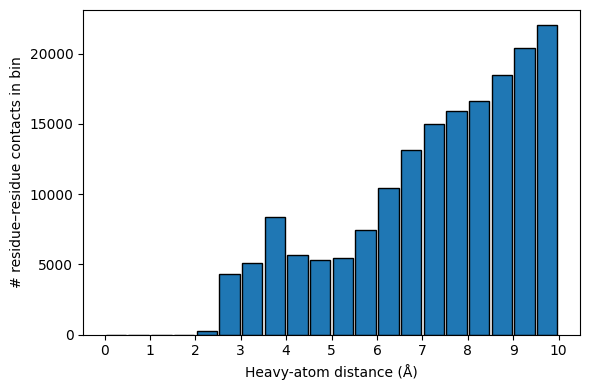

In [42]:
# %% Collapse raw atom-atom table to one distance per residue pair  (skip if res_contacts already exists)
res_contacts = (
    contacts.groupby(["pdb_id","ep_chain","ep_resnum",
                      "mhc_chain","mhc_resnum"])["min_distance"]
            .min()
            .reset_index()
)

# %% Plot #contacts per distance bin (0.5 Å bins up to 10 Å)
import numpy as np, matplotlib.pyplot as plt

bin_edges = np.arange(0, 10.5, 0.5)          # 0–10 Å, half-Å bins
hist, _ = np.histogram(res_contacts["min_distance"], bins=bin_edges)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure(figsize=(6,4))
plt.bar(bin_centers, hist, width=0.45, align="center", edgecolor="black")
plt.xlabel("Heavy-atom distance (Å)")
plt.ylabel("# residue–residue contacts in bin")
plt.xticks(np.arange(0, 10.5, 1))
plt.tight_layout()
plt.show()


In [43]:
# from Bio.PDB import PDBParser, is_aa
# import pandas as pd
# import os

# # Local directory containing the PDBs
# pdb_dir = "/clusterfs/nilah/sergio/RFdifussion/structures/pdb_files"

# # Get list of all PDB files
# pdb_files = [f for f in os.listdir(pdb_dir) if f.endswith(".pdb")]

# parser = PDBParser(QUIET=True)
# results = []

# for pdb_file in pdb_files:
#     pdb_id = pdb_file.replace(".pdb", "").upper()
#     path = os.path.join(pdb_dir, pdb_file)

#     try:
#         structure = parser.get_structure(pdb_id, path)[0]  # Use first model
#     except Exception as e:
#         print(f"❌ Skipping {pdb_id} due to error: {e}")
#         continue

#     for chain in structure.get_chains():
#         residues = [res for res in chain if is_aa(res)]
#         results.append({
#             "pdb_id": pdb_id,
#             "chain_id": chain.id,
#             "num_residues": len(residues),
#             "residues_preview": "-".join(res.resname for res in residues[:5]) + ("..." if len(residues) > 5 else "")
#         })

# df = pd.DataFrame(results)
# df.to_csv("pdb_chain_summary.csv", index=False)
# print("✅ Finished. Saved chain info to pdb_chain_summary.csv")


In [44]:
pdb_chain_summary = pd.read_csv("pdb_chain_summary.csv")

In [45]:
# from Bio.PDB import PDBParser, NeighborSearch
# from scipy.spatial.distance import cdist

# pdb_dir = "/clusterfs/nilah/sergio/RFdifussion/structures/pdb_files"
# cutoff = 5.0  # Å

# parser = PDBParser(QUIET=True)
# all_contacts = []

# for pdb_file in os.listdir(pdb_dir):
#     if not pdb_file.endswith(".pdb"):
#         continue

#     pdb_id = pdb_file.replace(".pdb", "").upper()
#     pdb_path = os.path.join(pdb_dir, pdb_file)

#     try:
#         structure = parser.get_structure(pdb_id, pdb_path)[0]  # first model
#         chains = list(structure.get_chains())

#         # Chain lengths for auto-classification
#         chain_lens = {ch.id: len([res for res in ch if res.id[0] == " "]) for ch in chains}
#         epitopes = [cid for cid, l in chain_lens.items() if 7 <= l <= 15]
#         mhcs     = [cid for cid, l in chain_lens.items() if 150 <= l <= 300]

#         for epi_id in epitopes:
#             for mhc_id in mhcs:
#                 atoms_epi = [a for a in structure[epi_id].get_atoms() if a.element != "H"]
#                 atoms_mhc = [a for a in structure[mhc_id].get_atoms() if a.element != "H"]
#                 ns = NeighborSearch(atoms_epi + atoms_mhc)

#                 for atom in atoms_epi:
#                     for neighbor in ns.search(atom.coord, cutoff):
#                         if neighbor in atoms_mhc:
#                             res_epi = atom.get_parent()
#                             res_mhc = neighbor.get_parent()
#                             coords_epi = np.array([a.coord for a in res_epi if a.element != "H"])
#                             coords_mhc = np.array([a.coord for a in res_mhc if a.element != "H"])
#                             min_dist = cdist(coords_epi, coords_mhc).min()

#                             all_contacts.append({
#                                 "pdb_id": pdb_id,
#                                 "epitope_chain": epi_id,
#                                 "epitope_resnum": res_epi.id[1],
#                                 "epitope_resname": res_epi.resname,
#                                 "mhc_chain": mhc_id,
#                                 "mhc_resnum": res_mhc.id[1],
#                                 "mhc_resname": res_mhc.resname,
#                                 "min_distance": round(min_dist, 2)
#                             })

#     except Exception as e:
#         print(f"❌ {pdb_id} skipped: {e}")
#         continue

# # Create and save the final dataframe
# df = pd.DataFrame(all_contacts)
# df.to_csv("mhc_epitope_contacts.csv", index=False)
# print("✅ Saved contact table as mhc_epitope_contacts.csv")


In [46]:
mhc_epitope_contacts = pd.read_csv("mhc_epitope_contacts.csv")

In [47]:

interactions = mhc_epitope_contacts.drop_duplicates().reset_index(drop=True)

In [48]:
# 1. Count how many distinct epitope residues contact each MHC residue
contact_counts = interactions.groupby(['mhc_chain', 'mhc_resnum'])['epitope_resnum'].nunique().reset_index()
contact_counts = contact_counts.rename(columns={'epitope_resnum': 'contact_count'})

# 2. Merge back into original interaction DataFrame
interactions = interactions.merge(contact_counts, on=['mhc_chain', 'mhc_resnum'], how='left')

# 3. Assign importance tier based on contact count
interactions["importance"] = interactions["contact_count"].map(
    lambda x: "core_hotspot" if x >= 4 else
              "high_contact" if x == 3 else
              "medium_contact" if x == 2 else
              "low_contact"
)


In [49]:
interactions_sub = interactions[(interactions['mhc_resnum'] < 400) & (interactions['epitope_resnum'] < 14)]

In [50]:
interactions_sub['pdb_id'].nunique()

221

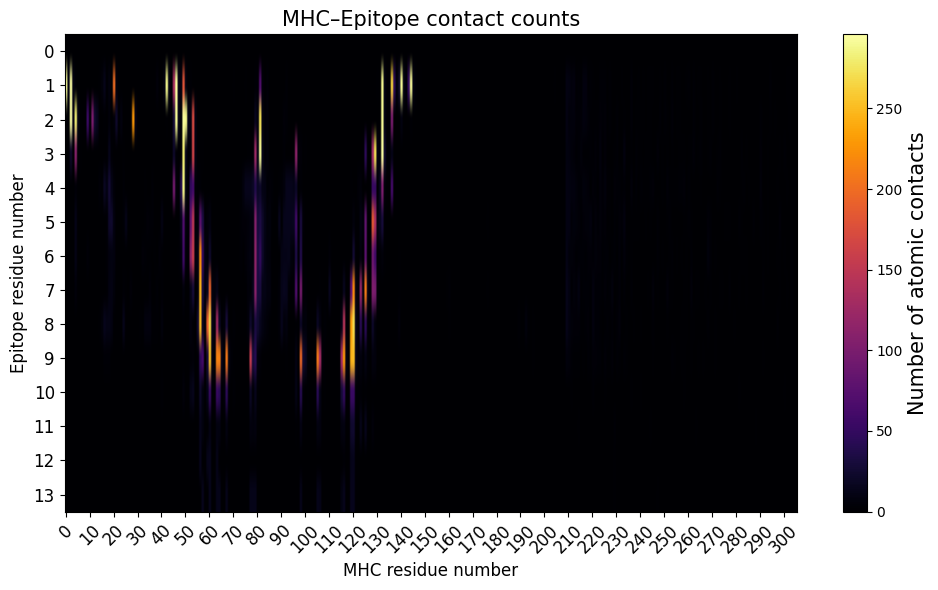

In [51]:
interactions_sub
contact_matrix = (
    pd.crosstab(interactions_sub["mhc_resnum"], interactions_sub["epitope_resnum"])
    .sort_index(axis=0)  # sort MHC residues
    .sort_index(axis=1)  # sort epitope residues
).T

# 2. Plot heatmap
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(contact_matrix, aspect="auto", cmap="inferno")

# Axis labels & ticks
ax.set_ylabel("Epitope residue number", size = 12)
ax.set_xlabel("MHC residue number", size = 12)
ax.set_title("MHC–Epitope contact counts", size = 15)

# Tick positions & labels
ax.set_xticks(np.arange(0, 310, 10))
ax.set_xticklabels(np.arange(0, 310, 10), size = 12, rotation =45)
ax.set_yticks(range(contact_matrix.shape[0]))
ax.set_yticklabels(contact_matrix.index, size = 12)

# Colorbar to indicate count intensity
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Number of atomic contacts", size = 15) #, rotation = 0)

output_dir = '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/figures/'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, f'CONTACTMAPS.pdf')
plt.savefig(output_path, bbox_inches='tight')

plt.tight_layout()

In [52]:
np.arange(0, 389, 10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380])

In [53]:
core_counts = (
    interactions[(interactions['importance'] == 'core_hotspot') & 
                 (interactions['min_distance'] < 3)]
    .groupby('pdb_id')['mhc_resnum']
    .nunique()
    .reset_index(name='n_core_hotspot_residues')
    .sort_values(by='n_core_hotspot_residues', ascending=False)
)


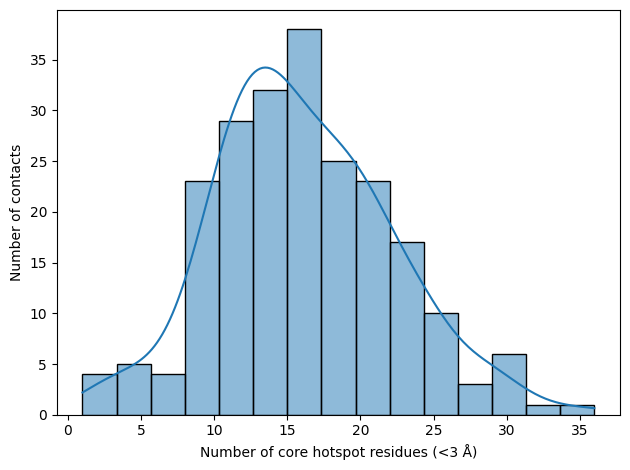

In [54]:
sns.histplot(core_counts['n_core_hotspot_residues'], bins=15, kde=True)
plt.xlabel('Number of core hotspot residues (<3 Å)')
plt.ylabel('Number of contacts')
# plt.title('Distribution of Strong Core Hotspot Contacts')
plt.tight_layout()
output_dir = '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/figures/'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, f'THREEARMMAPS.pdf')
plt.savefig(output_path, bbox_inches='tight')
plt.show()


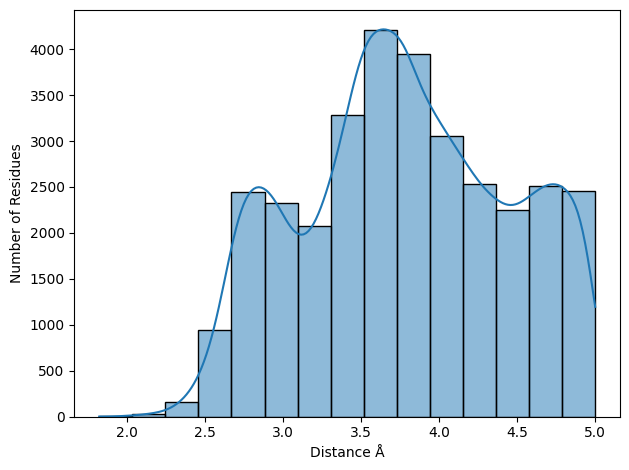

In [55]:
sns.histplot(interactions['min_distance'], bins=15, kde=True)
plt.xlabel('Distance Å')
plt.ylabel('Number of Residues')
# plt.title('Distribution of Å distance per Contacts')
plt.tight_layout()
output_dir = '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/figures/'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, f'DISTANCEARMSTRONG.pdf')
plt.savefig(output_path, bbox_inches='tight')
plt.show()


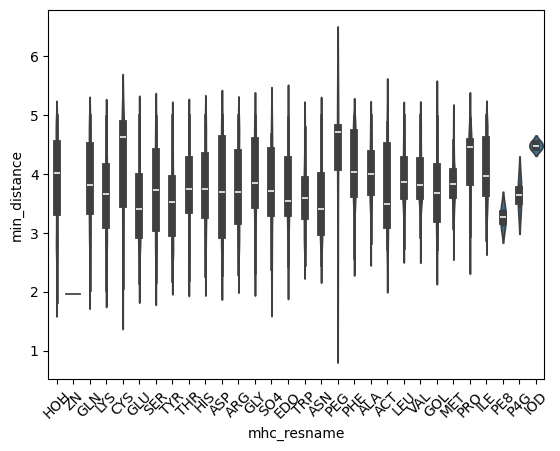

In [56]:
sns.violinplot(data=interactions.sort_values(by='min_distance'), x='mhc_resname', y='min_distance')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='pdb_id', ylabel='min_distance'>

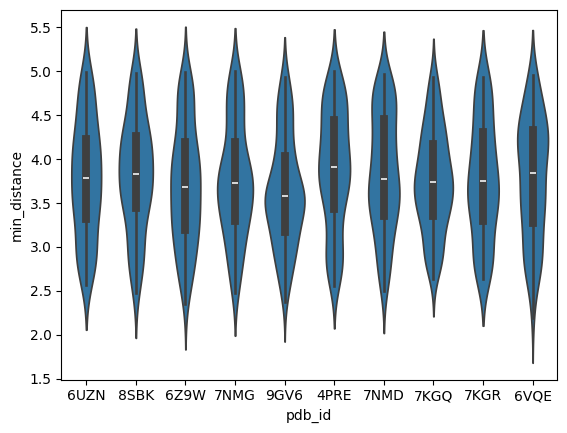

In [57]:
#find the distribution of min distance per pdb_id
interactions.groupby('pdb_id')['min_distance'].describe().reset_index()

#plot the distribution of min distance per pdb_id one bar per pdb_id 
#Plot a violin plot of the distribution of min distance per pdb_id
# sns.violinplot(data=interactions, x='pdb_id', y='min_distance')

#there are too many pdb_ids to plot all of them, so we will plot only the first 10
sns.violinplot(data=interactions[interactions['pdb_id'].isin(interactions['pdb_id'].unique()[:10])], x='pdb_id', y='min_distance')

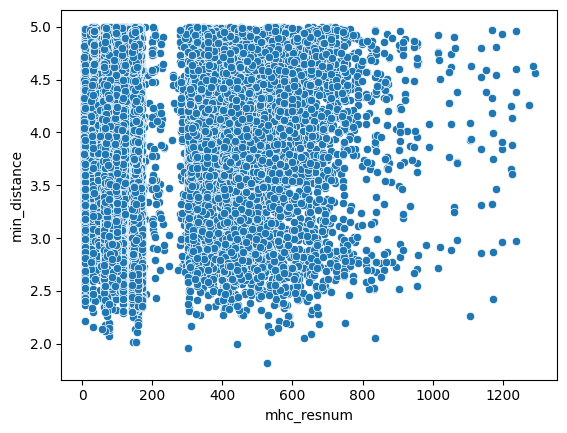

In [58]:
sns.scatterplot(data=interactions, x='mhc_resnum', y='min_distance')
plt.show()

<Axes: xlabel='mpnn', ylabel='i_ptm'>

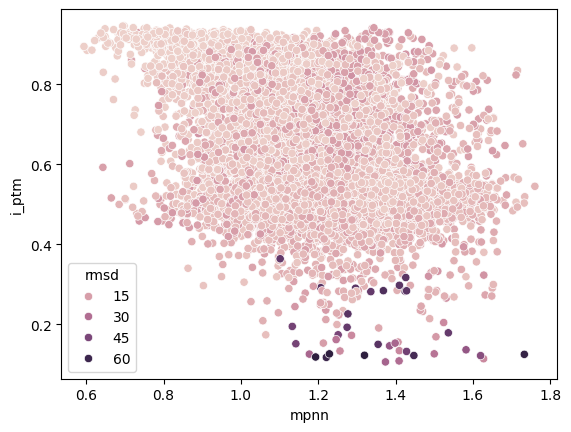

In [59]:
sns.scatterplot(data=results, x = 'mpnn', y='i_ptm', hue = 'rmsd')

In [60]:
results.head()

,n,mpnn,plddt,i_ptm,i_pae,rmsd,seq,RUN,epitope,length
0,0,1.578673,0.371702,0.538972,16.794023,6.563395,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,/clusterfs/nilah/sergio/RFdifussion/7RTD,AALDEFLPP,9
1,1,1.734082,0.300439,0.519114,17.692208,6.457840,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,/clusterfs/nilah/sergio/RFdifussion/7RTD,DALAVYLPP,9
2,2,1.592548,0.300626,0.489816,18.015840,5.452526,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,/clusterfs/nilah/sergio/RFdifussion/7RTD,AALEEFTPP,9
3,3,1.649663,0.378298,0.551428,16.531989,7.321498,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,/clusterfs/nilah/sergio/RFdifussion/7RTD,SLLDVFLPP,9
4,4,1.552341,0.304425,0.503693,17.588620,5.115226,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,/clusterfs/nilah/sergio/RFdifussion/7RTD,DALDTFTPP,9


<Axes: xlabel='mpnn', ylabel='i_ptm'>

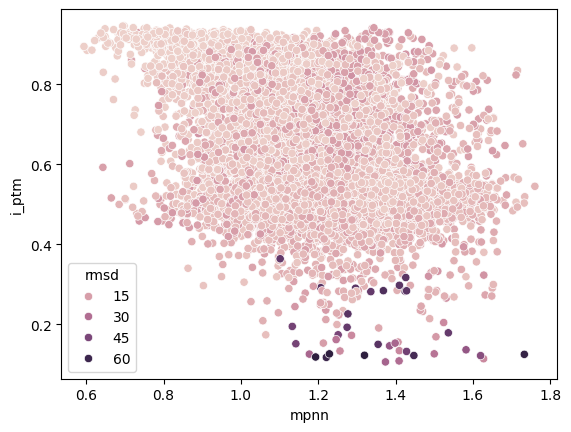

In [61]:
sns.scatterplot(data=results, x = 'mpnn', y='i_ptm', hue = 'rmsd')

<Axes: xlabel='rmsd', ylabel='i_ptm'>

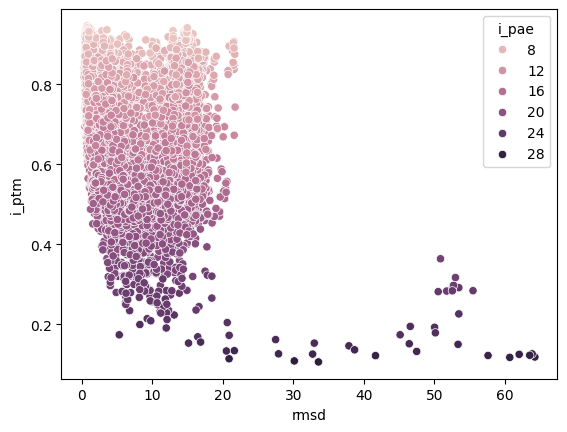

In [62]:
sns.scatterplot(data=results, x = 'rmsd', y='i_ptm', hue = 'i_pae')

<Axes: xlabel='plddt', ylabel='i_ptm'>

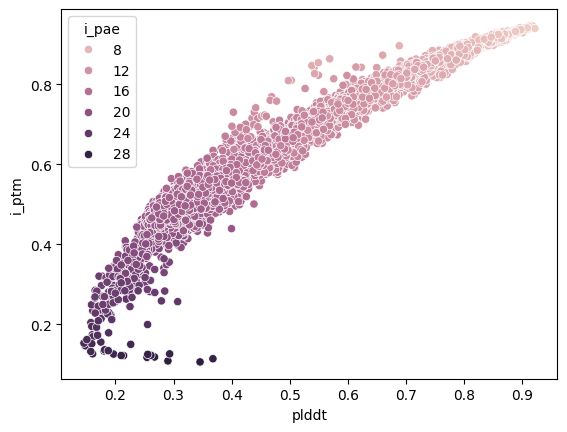

In [63]:
sns.scatterplot(data=results, x = 'plddt', y='i_ptm', hue = 'i_pae')

In [64]:
# Count chains per PDB
chain_counts = pdb_chain_summary.groupby('pdb_id').size().reset_index(name='num_chains')

# Filter to PDBs that have exactly 3 chains
three_chain_pdbs = chain_counts[chain_counts['num_chains'] == 3].sort_values(by='num_chains', ascending=False)


In [65]:
# Filter the full chain summary to only 3-chain PDBs
filtered_summary = pdb_chain_summary[pdb_chain_summary['pdb_id'].isin(three_chain_pdbs['pdb_id'])]

In [66]:
interactions

,pdb_id,epitope_chain,epitope_resnum,epitope_resname,mhc_chain,mhc_resnum,mhc_resname,min_distance,contact_count,importance
0,6UZN,C,1,THR,A,167,TRP,3.44,29,core_hotspot
1,6UZN,C,1,THR,A,5,MET,4.22,4,core_hotspot
2,6UZN,C,1,THR,A,171,TYR,2.57,8,core_hotspot
3,6UZN,C,1,THR,A,33,PHE,4.86,6,core_hotspot
4,6UZN,C,1,THR,A,59,TYR,3.72,19,core_hotspot
...,...,...,...,...,...,...,...,...,...,...
32230,8ROO,B,107,HOH,A,155,GLN,4.11,44,core_hotspot
32231,8ROO,B,107,HOH,A,604,HOH,3.08,12,core_hotspot
32232,8ROO,B,107,HOH,A,159,TYR,3.91,39,core_hotspot
32233,8ROO,B,107,HOH,A,424,HOH,2.87,10,core_hotspot


In [67]:
import os
from pathlib import Path
import pandas as pd

# --------------------------------------------------------------------------------------------------
# ASSUMPTION: 'filtered_summary' and 'interactions' DataFrames are already in your workspace.
# - filtered_summary columns: ['pdb_id', 'chain_id', 'num_residues', 'residues_preview']
# - interactions columns: ['pdb_id','epitope_chain','mhc_chain','mhc_resnum','importance',...]
# --------------------------------------------------------------------------------------------------

# 1) Build the job parameters DataFrame
job_params = []

# Only include PDBs with exactly 3 chains
chain_counts = filtered_summary.groupby('pdb_id').size()
three_chain_pdbs = chain_counts[chain_counts == 3].index.tolist()

for pdb_id in three_chain_pdbs:
    chains_df = filtered_summary[filtered_summary['pdb_id'] == pdb_id]
    chains = ",".join(chains_df['chain_id'].tolist())
    
    # Determine epitope chain: the one with smallest num_residues
    ep_chain = chains_df.loc[chains_df['num_residues'].idxmin(), 'chain_id']
    
    # Collect hotspot residues (core + high + medium)
    inter_df = interactions[
        (interactions['pdb_id'] == pdb_id) &
        (interactions['epitope_chain'] == ep_chain) &
        (interactions['importance'].isin(['core_hotspot','high_contact','medium_contact']))
    ]
    hotspots = sorted({f"{row['mhc_chain']}{row['mhc_resnum']}" for _, row in inter_df.iterrows()})

    if len(hotspots) < 5:
        inter_df = interactions[
            (interactions['pdb_id'] == pdb_id) &
            (interactions['epitope_chain'] == ep_chain) &
            (interactions['importance'].isin(['high_contact','medium_contact']))
        ]
    
    job_params.append({
        'pdb_id': pdb_id,
        'chains': chains,
        'epitope_chain': ep_chain,
        'hotspots': ",".join(hotspots)
    })

df_job_params = pd.DataFrame(job_params)

# 2) Generate SLURM scripts from df_job_params
script_path = "/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/ESMCBA/run_RFDiffusionMHC_epitope.py"
sh_dir   = Path("/clusterfs/nilah/sergio/RFdifussion/slurm_jobs/EPITOPE_SERIES3")
log_dir  = Path("/clusterfs/nilah/sergio/RFdifussion/logs/EPITOPE_SERIES2")

sh_dir.mkdir(parents=True, exist_ok=True)
log_dir.mkdir(parents=True, exist_ok=True)

iterations_list = [50]
num_seqs_list   = [32]

for trial in range(2100, 2300):
    for _, row in df_job_params.iterrows():
        # get chain lengths for contigs construction
        lengths = {
            ch: filtered_summary.query(f"pdb_id=='{row.pdb_id}' & chain_id=='{ch}'").num_residues.item()
            for ch in row.chains.split(",")
        }
        # build contigs string
        parts = []
        for ch, L in lengths.items():

            if ch == row.epitope_chain:
                
                LENGTH = np.random.randint(7,13)
                L = LENGTH

                parts.append(f"0/{L}")
            else:
                parts.append(f"{ch}1-{L}/0")
        full_contigs = " ".join(parts)

        for it in iterations_list:
            for ns in num_seqs_list:
                base = f"{row.pdb_id}_C{row.epitope_chain}{lengths[row.epitope_chain]}_I{it}_NS{ns}_{LENGTH}_{trial}"
                fname = f"RFD_HP_{base}"
                sh_path = sh_dir / f"{fname}.sh"
                cmd = (
                    f"python {script_path} "
                    f"--name {fname} "
                    f"--pdb {row.pdb_id} "
                    f"--contigs \"{full_contigs}\" "
                    f"--hotspots \"{row.hotspots}\" "
                    f"--chains {row.chains} "
                    f"--epitope_chain {row.epitope_chain} "
                    f"--iterations {it} "
                    f"--num_seqs {ns}"
                )
                with open(sh_path, "w") as fh:
                    fh.write("#!/bin/bash\n")
                    fh.write("#SBATCH --account=co_nilah\n")
                    fh.write("#SBATCH --partition=savio3_gpu\n") #savio3_gpu savio2_1080ti
                    fh.write("#SBATCH --qos=savio_lowprio\n")
                    fh.write("#SBATCH --cpus-per-task=4\n")
                    fh.write("#SBATCH --gres=gpu:1\n")
                    fh.write("#SBATCH --requeue\n")
                    fh.write("#SBATCH --time=00:57:00\n")
                    fh.write(f"#SBATCH --job-name={fname}\n")
                    fh.write(f"#SBATCH --output={log_dir}/{fname}_%j.out\n")
                    fh.write(f"#SBATCH --error={log_dir}/{fname}_%j.err\n\n")
                    fh.write("source /clusterfs/nilah/sergio/miniconda3/etc/profile.d/conda.sh\n")
                    fh.write("conda activate SE3nv\n\n")
                    fh.write(cmd + "\n")
                os.chmod(sh_path, 0o755)
                print(f"✅ Created {sh_path.name}")

✅ Created RFD_HP_1HSB_CC3_I50_NS32_12_2100.sh
✅ Created RFD_HP_1SYV_CC9_I50_NS32_10_2100.sh
✅ Created RFD_HP_1YDP_CP9_I50_NS32_12_2100.sh
✅ Created RFD_HP_3KPN_CC9_I50_NS32_12_2100.sh
✅ Created RFD_HP_3KPO_CC9_I50_NS32_7_2100.sh
✅ Created RFD_HP_3KYN_CP9_I50_NS32_9_2100.sh
✅ Created RFD_HP_3OXR_CC10_I50_NS32_11_2100.sh
✅ Created RFD_HP_3OXS_CC10_I50_NS32_11_2100.sh
✅ Created RFD_HP_3TO2_CC9_I50_NS32_9_2100.sh
✅ Created RFD_HP_3VFM_CC13_I50_NS32_8_2100.sh
✅ Created RFD_HP_3VFN_CC13_I50_NS32_10_2100.sh
✅ Created RFD_HP_3VFO_CC13_I50_NS32_11_2100.sh
✅ Created RFD_HP_3VFP_CC13_I50_NS32_12_2100.sh
✅ Created RFD_HP_3VFR_CC13_I50_NS32_9_2100.sh
✅ Created RFD_HP_3VFS_CC13_I50_NS32_7_2100.sh
✅ Created RFD_HP_3VFT_CC13_I50_NS32_8_2100.sh
✅ Created RFD_HP_3VFU_CC13_I50_NS32_12_2100.sh
✅ Created RFD_HP_3VFV_CC13_I50_NS32_9_2100.sh
✅ Created RFD_HP_3VFW_CC13_I50_NS32_9_2100.sh
✅ Created RFD_HP_4HX1_CC9_I50_NS32_9_2100.sh
✅ Created RFD_HP_4PRA_CC11_I50_NS32_8_2100.sh
✅ Created RFD_HP_4PRB_CC11_I50_N

In [68]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

### Expading to new structures

In [ ]:
# results_file = glob.glob('/clusterfs/nilah/sergio/RFdifussion/outputs/*/*/*.csv')

# import os
# import pandas as pd

# def aggregate_results(results_files, run_id_level=-2, extra_columns=None):
#     """
#     Aggregate CSV files into a single DataFrame with run identifiers
#     (and file-creation timestamps).
    
#     Args:
#         results_files (list): List of paths to CSV files.
#         run_id_level (int): Directory level to extract run ID (e.g., -2 for parent of filename).
#         extra_columns (dict): Optional dict of column_name: func(file_path) to add metadata.
    
#     Returns:
#         pd.DataFrame: Concatenated DataFrame with run IDs, CREATED date, and optional columns.
#     """
#     if not results_files:
#         print("Warning: No files provided.")
#         return pd.DataFrame()

#     dfs = []
#     for file_path in results_files:
#         tmp = pd.read_csv(file_path)
        
#         # extract run and pdb from path
#         parts = file_path.split(os.sep)
#         tmp['RUN'] = parts[7]
#         tmp['PDB'] = parts[6]
        
#         # file creation time (in seconds since epoch) → pandas datetime
#         created_ts = os.path.getctime(file_path)
#         tmp['CREATED'] = pd.to_datetime(created_ts, unit='s')
        
#         # any extra columns passed in?
#         if extra_columns:
#             for col_name, func in extra_columns.items():
#                 tmp[col_name] = func(file_path)
        
#         dfs.append(tmp)

#     if dfs:
#         results = pd.concat(dfs, axis=0)
#         print(f"Aggregated {len(dfs)} files into DataFrame with {len(results)} rows.")
#         return results
#     else:
#         print("No valid files processed.")
#         return pd.DataFrame()

# results_pdbs = aggregate_results(results_file, run_id_level=-2) #, extra_columns=extra_columns)
# #Aggregated 1225 files into DataFrame with 39200 rows.
# # Aggregated 1386 files into DataFrame with 44352 rows.
# # Aggregated 1425 files into DataFrame with 45600 rows.
# # Aggregated 1529 files into DataFrame with 48928 rows.
# # Aggregated 1723 files into DataFrame with 55136 rows.
# # Aggregated 1773 files into DataFrame with 56736 rows.
# # Aggregated 1839 files into DataFrame with 58848 rows. #damn ...
# # Aggregated 3394 files into DataFrame with 108608 rows.
# # Aggregated 3642 files into DataFrame with 116544 rows.
# # Aggregated 5302 files into DataFrame with 169664 rows.
# # Aggregated 7230 files into DataFrame with 231360 rows.
# # Aggregated 7394 files into DataFrame with 236608 rows.

In [ ]:
# results_meta = pd.merge(results_pdbs, df_meta, left_on='PDB', right_on='pdb_id', how='left')

results_meta = pd.read_csv('/global/scratch/users/sergiomar10/ESMCBA/rdfiffusion_output_peptides.csv')

# results_meta['title'] = results_meta['title'].str.replace(r"[\n\r]", " ", regex=True)

# results_meta['title'] = results_meta['title'].str.replace(':','')
# # results_meta['title'] = results_meta['title'].str.replace('-','')
# # results_meta['title'] = results_meta['title'].str.replace(' ','-')

# # 2. Extract HLA alleles of the form HLA-A*01:01 (or B,C, etc.)
results_meta['hla_allele'] = results_meta['title'].apply(grab_hla)
results_meta['hla_allele'] = results_meta['hla_allele'].str.replace('HLA','').str.replace('-','').str.replace(':','').str.replace('*','')

In [ ]:
results_meta['epitope'] = results_meta['seq'].apply(lambda x: x.split("/")[1])
results_meta['length'] = results_meta['epitope'].apply(lambda x: len(x))

In [ ]:
results_meta[['PDB', 'length','hla_allele','RUN']].drop_duplicates('RUN').groupby(['PDB','hla_allele'])['RUN'].size().reset_index().sort_values(by='RUN', ascending=False).head(15)

,PDB,hla_allele,RUN
1,3KPN,B4403,152
5,3TO2,A0201,148
2,3KPO,B4403,147
15,3VFW,B3508,145
0,1SYV,B4405,142
10,3VFR,B3508,138
7,3VFN,B3508,137
14,3VFV,B3508,137
6,3VFM,B3508,135
8,3VFO,B3508,135


In [ ]:
results_meta[['PDB', 'length','hla_allele']].drop_duplicates().groupby(['PDB','hla_allele'])['length'].size().reset_index(name='length_sizes').sort_values('length_sizes', ascending=False).head(15)

,PDB,hla_allele,length_sizes
11,3VFS,B3508,7
53,6VQD,B2705,7
6,3VFM,B3508,7
7,3VFN,B3508,7
8,3VFO,B3508,7
9,3VFP,B3508,7
10,3VFR,B3508,7
68,7KGT,A0201,7
12,3VFT,B3508,7
13,3VFU,B3508,7


In [ ]:
results_meta[results_meta['hla_allele'] == 'HLA-A*0201']['PDB'].unique()


array([], dtype=object)

In [ ]:
# results_meta = pd.merge(results_pdbs, df_meta, left_on='PDB', right_on='pdb_id', how='left')

In [ ]:
results_meta[results_meta['PDB'] == '6VB4']['title'].values[0]

'HLA-B*1502 complexed with a synthetic peptide'

In [ ]:
results_meta = results_meta.drop_duplicates(['pdb_id', 'epitope'])

In [ ]:
# results_meta.to_csv('rdfiffusion_output_peptides.csv', index=False)
results_meta['hla_allele'].unique()

array(['B5301', 'B2705', 'B1502', None, 'N0101', 'B5703', 'B8', 'A0201',
       'B1801', 'B3501', 'A2402', 'B4403', 'B3508', 'B1301', 'A2',
       'B4405', 'B5801', 'B3505', 'B1501', 'A6', 'A0206', 'A0207',
       'B4001', 'B5803', 'B5701', 'C1203', 'C1202', 'B2706', 'B3503'],
      dtype=object)

In [ ]:
# results_meta[results_meta['hla_allele'] == allele]['PDB'].unique()

In [ ]:
# allele = 'B1501'
# # pdbs = ['7KGP', '7KGS', '7MJ9', '7MJ6'] #, '7SA2']
# pdbs = ['6UZS', '7XF3', '6VB3', '6UZQ'] #results_meta[results_meta['hla_allele'] == allele]['PDB'].unique()
#   #['7KGP', '7KGQ', '7MJ9', '7MJ6'] # ['6UZN', '6VB0', '6VB6', '6VB4']
# amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

# # Loop through epitope lengths
# for n in range(8, 15):
#     fig, axes = plt.subplots(1, len(pdbs), figsize=(20, 4), constrained_layout=True)
#     found_any = False

#     for i, pdb in enumerate(pdbs):
#         ax = axes[i]
#         results_pdb = results_meta[results_meta['PDB'] == pdb].drop_duplicates('seq')
#         sequences = results_pdb[(results_pdb['epitope'].str.len() == n) & (results_pdb['plddt'] >= 0.8) ]['epitope'].tolist() #& (results_pdb['plddt'] > 0.8)

#         if len(sequences) == 0:
#             ax.axis('off')
#             ax.set_title(f"{pdb}\n(no {n}-mers)")
#             continue

#         found_any = True
#         freq_matrix = np.zeros((n, len(amino_acids)))

#         for seq in sequences:
#             for j, aa in enumerate(seq):
#                 if aa in amino_acids:
#                     freq_matrix[j, amino_acids.index(aa)] += 1

#         freq_matrix /= len(sequences)
#         freq_df = pd.DataFrame(freq_matrix, columns=amino_acids)

#         logomaker.Logo(freq_df, ax=ax, color_scheme='chemistry')
#         #set sup title for all plos
#         ax.set_xlabel("Position")
#         ax.set_ylabel("Frequency")
#         ax.set_xticks(range(n))
#         ax.set_xticklabels(range(1, n + 1))


#         ax.set_title(f"{allele} {pdb}")
#         ax.set_ylabel("")

#         if n == 9:
#             output_dir = '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/figures/'
#             os.makedirs(output_dir, exist_ok=True)
#             output_path = os.path.join(output_dir, f'{allele}_SEQLOGO_DONE.pdf')
#             plt.savefig(output_path, bbox_inches='tight')


#     if found_any:
#         plt.show()
#     else:
#         plt.close(fig)


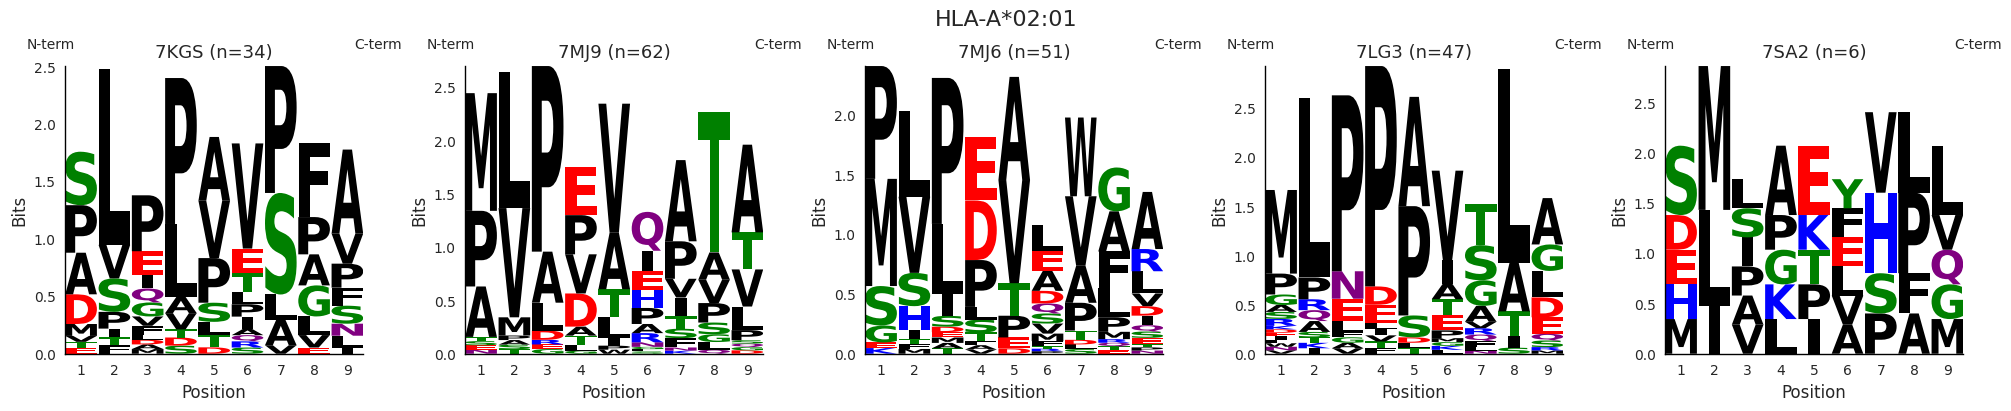

In [ ]:
allele      = 'A*02:01'
pdbs        = ['7KGS', '7MJ9', '7MJ6', '7LG3', '7SA2'] #['7KGS', '7MJ9', '7MJ6', '7LG3', '7SA2'] # ['6UZS', '6VB3', '6UZQ', '7XF3'] #results_meta[results_meta['hla_allele'] == allele]['PDB'].unique() #['6UZS', '7XF3', '6VB3', '6UZQ'] #['7KGS', '7MJ9', '7MJ6', '7LG3', '7SA2'] #results_meta[results_meta['hla_allele'] == allele]['PDB'].unique()[7:] 
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")
n = 9   # only 9-mers

fig, axes = plt.subplots(1, len(pdbs), figsize=(20, 4), constrained_layout=True)
found = False

for ax, pdb in zip(axes, pdbs):
    mask = (
        (results_meta['PDB'] == pdb) &
        (results_meta['epitope'].str.len() == n) &
        (results_meta['plddt'] >= 0.7)
    )
    entries = results_meta.loc[mask, 'epitope'].drop_duplicates()
    seqs    = entries.tolist()
    
    if not seqs:
        ax.axis('off')
        ax.set_title(f"{pdb}\n(no {n}-mers)", fontsize=12)
        continue

    found = True
    # count matrix
    count_mat = np.zeros((n, len(amino_acids)), dtype=float)
    for seq in seqs:
        for pos, aa in enumerate(seq):
            try:
                idx = amino_acids.index(aa)
            except ValueError:
                continue
            count_mat[pos, idx] += 1

    # frequencies
    freq_mat = count_mat / count_mat.sum(axis=1, keepdims=True)
    freq_df  = pd.DataFrame(freq_mat, columns=amino_acids)

    # uniform background array
    bg_array = [1/20] * len(amino_acids)

    # information content
    info_df = logomaker.transform_matrix(
        freq_df,
        from_type='probability',
        to_type='information',
        background=bg_array
    )

    # draw the logo
    logo = logomaker.Logo(
        info_df,
        ax=ax,
        color_scheme='chemistry',
    )
    logo.style_spines(visible=False)
    logo.style_spines(spines=['left','bottom'], visible=True)

    # X ticks and labels
    ax.set_xticks(range(n))
    ax.set_xticklabels([str(i+1) for i in range(n)])
    ax.set_xlabel("Position", fontsize=12)
    ax.set_ylabel("Bits", fontsize=12)

    # annotate N- and C-termini
    ax.text(
        -0.2, 1.05, "N-term",
        transform=ax.get_xaxis_transform(),
        ha='right', va='bottom', fontsize=10
    )
    ax.text(
        n-0.8, 1.05, "C-term",
        transform=ax.get_xaxis_transform(),
        ha='left', va='bottom', fontsize=10
    )

    # only PDB + peptide count in title
    ax.set_title(f"{pdb} (n={len(seqs)})", fontsize=13)

# save/show
if found:
    output_dir = '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/figures/'
    os.makedirs(output_dir, exist_ok=True)
    fig.suptitle(
        f"HLA-{allele}",
        fontsize=16
    )
    fig.savefig(
        os.path.join(output_dir, f'{allele}_9mer_info_logo.pdf'),
        bbox_inches='tight'
    )
    plt.show()
else:
    plt.close(fig)


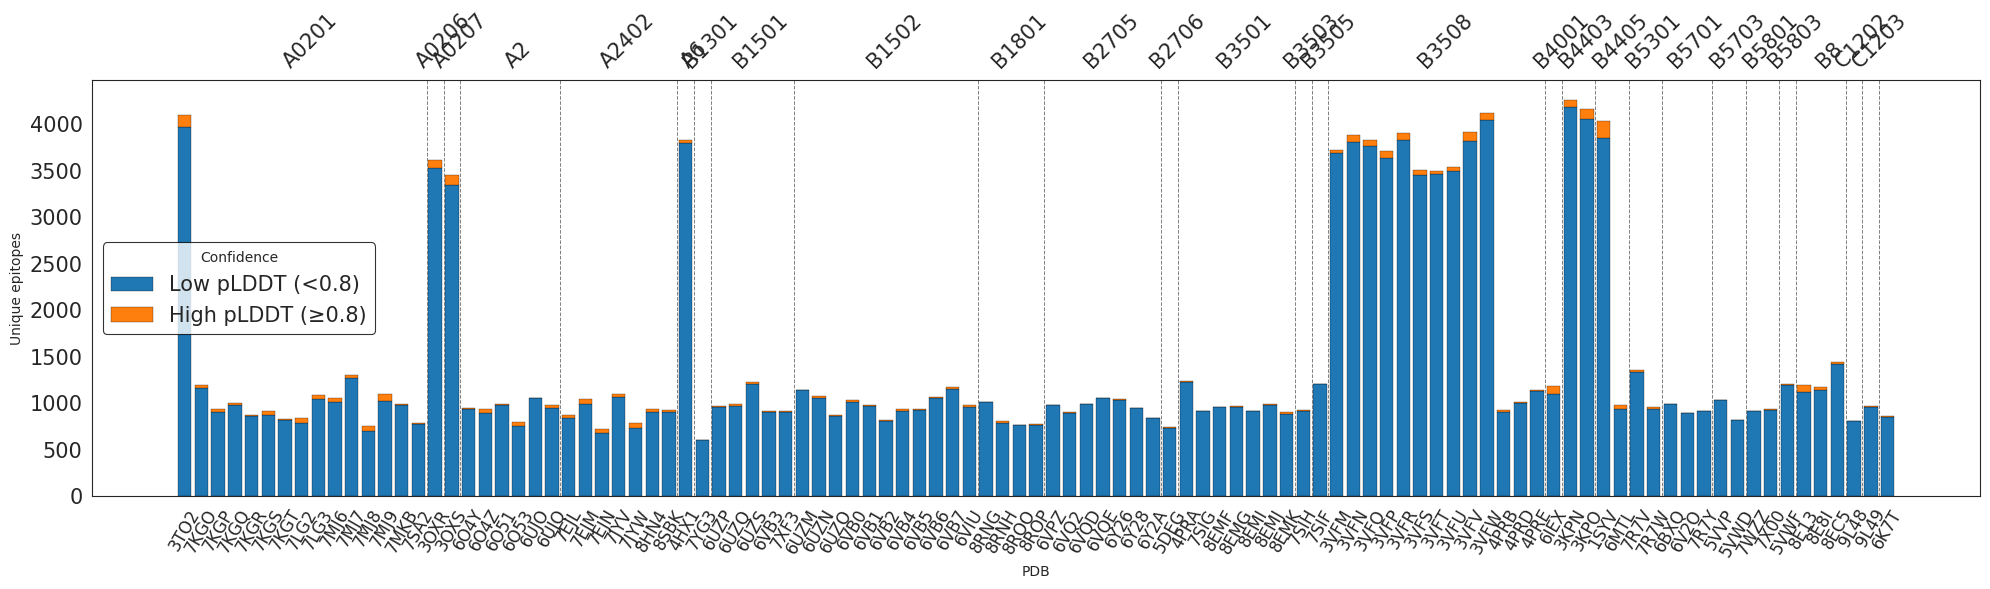

In [ ]:

# ------------------------------------------------------------------
# 1.  Build a long table with a confidence label
# ------------------------------------------------------------------
tmp = (
    results_meta
      .drop_duplicates(subset=['epitope', 'PDB'])           # one epitope / PDB
      .assign(conf=lambda d: np.where(d['plddt'] >= 0.8,
                                      'High pLDDT (≥0.8)',
                                      'Low pLDDT (<0.8)'))
)

counts = (tmp
          .groupby(['hla_allele', 'PDB', 'conf'])
          .size()
          .reset_index(name='num_epitopes'))

# ------------------------------------------------------------------
# 2.  Order bars: hla_allele blocks, then TOTAL-count desc. within each block
# ------------------------------------------------------------------
# 2-a. get total per PDB to sort inside each allele block
total = (counts.groupby(['hla_allele', 'PDB'])['num_epitopes']
               .sum()
               .reset_index(name='total_epitopes'))

counts = counts.merge(total, on=['hla_allele', 'PDB'])

counts = (counts
          .sort_values(['hla_allele', 'total_epitopes'],
                       ascending=[True, False])
          .reset_index(drop=True))

# track allele boundaries
allele_boundary = counts[['hla_allele', 'PDB']].drop_duplicates()
allele_boundary['group_idx'] = allele_boundary['hla_allele'].ne(
                                   allele_boundary['hla_allele'].shift()
                               ).cumsum()
counts = counts.merge(allele_boundary, on=['hla_allele', 'PDB'])

bar_order = allele_boundary['PDB'].tolist()        # order for plotting

# ------------------------------------------------------------------
# 3.  Pivot to wide form for a manual stacked plot
# ------------------------------------------------------------------
wide = (counts
        .pivot_table(index=['hla_allele', 'PDB', 'group_idx'],
                     columns='conf',
                     values='num_epitopes',
                     fill_value=0)
        .reset_index())

# guarantee both columns exist even if one tier is missing
for c in ['High pLDDT (≥0.8)', 'Low pLDDT (<0.8)']:
    if c not in wide.columns:
        wide[c] = 0

# ------------------------------------------------------------------
# 4.  Draw stacked bars
# ------------------------------------------------------------------
plt.figure(figsize=(20, 6))

bottom = np.zeros(len(wide))
colors = ['tab:blue', 'tab:orange']   # low first (bottom), high on top
labels = ['Low pLDDT (<0.8)', 'High pLDDT (≥0.8)']

for col, color, lab in zip(labels, colors, labels):
    plt.bar(
        x=wide['PDB'],
        height=wide[col],
        bottom=bottom,
        color=color,
        label=lab,
        edgecolor='black',
        linewidth=0.2
    )
    bottom += wide[col].values

plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('Unique epitopes')
plt.xlabel('PDB')

plt.legend(
    title='Confidence',
    frameon=True,              # draw a legend box
    fontsize=15
)

# give that box a white fill and a thin black border
leg = plt.gca().get_legend()
leg.get_frame().set_facecolor('white')   # white background
leg.get_frame().set_edgecolor('black')   # optional: black outline
leg.get_frame().set_linewidth(0.8)


# ------------------------------------------------------------------
# 5.  Add vertical separators + allele labels
# ------------------------------------------------------------------
group_sizes = wide.groupby('group_idx').size().cumsum().values[:-1]

for xc in group_sizes:
    plt.axvline(x=xc - 0.5, color='grey', linestyle='--', lw=0.7)

midpoints = np.insert(group_sizes, 0, 0)
midpoints = (midpoints[:-1] + group_sizes) / 2
for xmid, allele in zip(midpoints, wide['hla_allele'].unique()):
    plt.text(xmid, plt.ylim()[1] * 1.02, allele,
             ha='center', va='bottom', fontsize=15, rotation=45)

output_dir = '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/figures/'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, f'BARPLOTS_COUNTS.pdf')
plt.savefig(output_path, bbox_inches='tight')

plt.tight_layout()
plt.show()


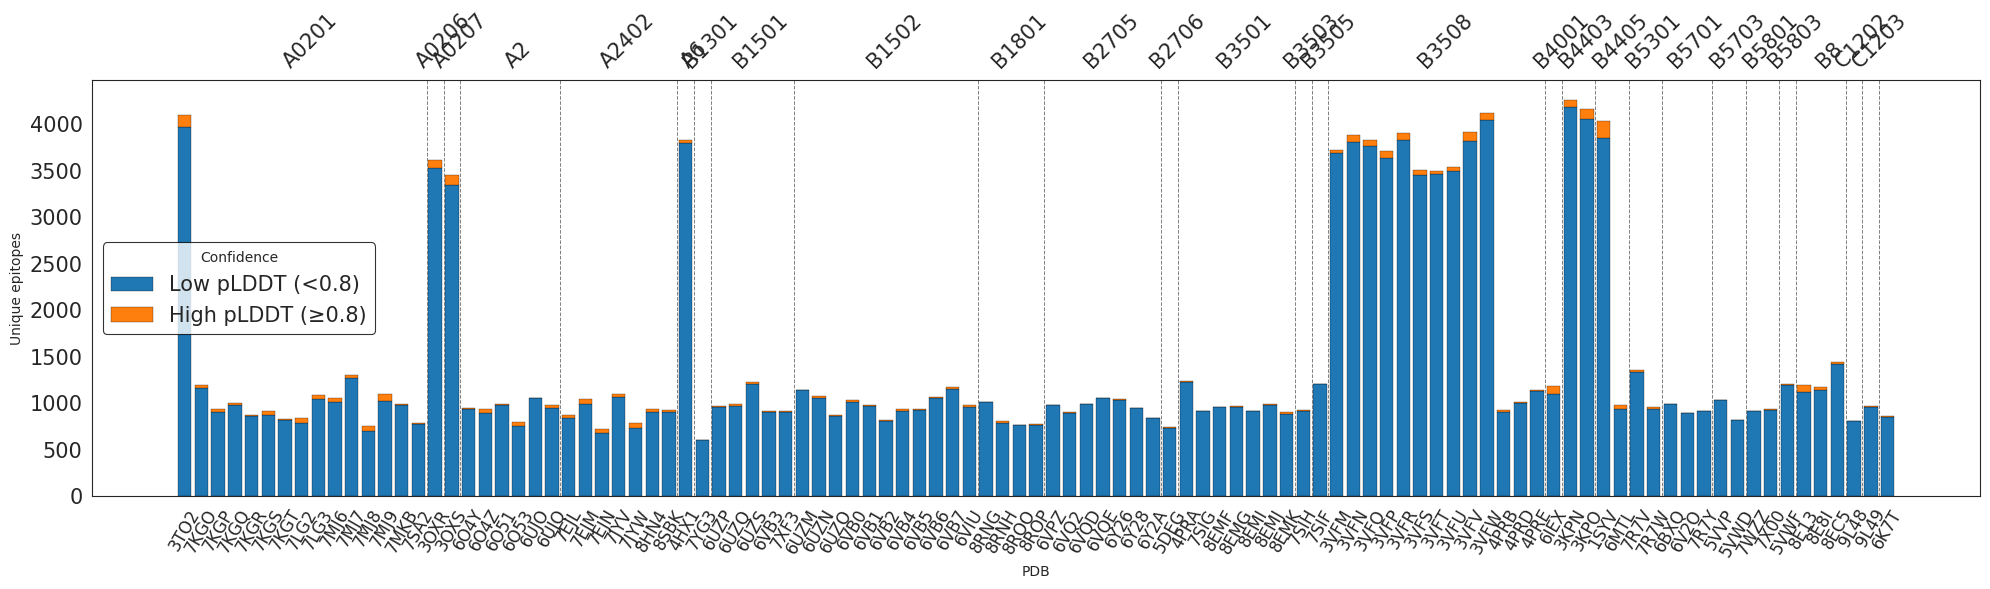

In [ ]:

# ------------------------------------------------------------------
# 1.  Build a long table with a confidence label
# ------------------------------------------------------------------
tmp = (
    results_meta
      .drop_duplicates(subset=['epitope', 'PDB'])           # one epitope / PDB
      .assign(conf=lambda d: np.where(d['plddt'] >= 0.8,
                                      'High pLDDT (≥0.8)',
                                      'Low pLDDT (<0.8)'))
)

counts = (tmp
          .groupby(['hla_allele', 'PDB', 'conf'])
          .size()
          .reset_index(name='num_epitopes'))

# ------------------------------------------------------------------
# 2.  Order bars: hla_allele blocks, then TOTAL-count desc. within each block
# ------------------------------------------------------------------
# 2-a. get total per PDB to sort inside each allele block
total = (counts.groupby(['hla_allele', 'PDB'])['num_epitopes']
               .sum()
               .reset_index(name='total_epitopes'))

counts = counts.merge(total, on=['hla_allele', 'PDB'])

counts = (counts
          .sort_values(['hla_allele', 'total_epitopes'],
                       ascending=[True, False])
          .reset_index(drop=True))

# track allele boundaries
allele_boundary = counts[['hla_allele', 'PDB']].drop_duplicates()
allele_boundary['group_idx'] = allele_boundary['hla_allele'].ne(
                                   allele_boundary['hla_allele'].shift()
                               ).cumsum()
counts = counts.merge(allele_boundary, on=['hla_allele', 'PDB'])

bar_order = allele_boundary['PDB'].tolist()        # order for plotting

# ------------------------------------------------------------------
# 3.  Pivot to wide form for a manual stacked plot
# ------------------------------------------------------------------
wide = (counts
        .pivot_table(index=['hla_allele', 'PDB', 'group_idx'],
                     columns='conf',
                     values='num_epitopes',
                     fill_value=0)
        .reset_index())

# guarantee both columns exist even if one tier is missing
for c in ['High pLDDT (≥0.8)', 'Low pLDDT (<0.8)']:
    if c not in wide.columns:
        wide[c] = 0

# ------------------------------------------------------------------
# 4.  Draw stacked bars
# ------------------------------------------------------------------
plt.figure(figsize=(20, 6))

bottom = np.zeros(len(wide))
colors = ['tab:blue', 'tab:orange']   # low first (bottom), high on top
labels = ['Low pLDDT (<0.8)', 'High pLDDT (≥0.8)']

for col, color, lab in zip(labels, colors, labels):
    plt.bar(
        x=wide['PDB'],
        height=wide[col],
        bottom=bottom,
        color=color,
        label=lab,
        edgecolor='black',
        linewidth=0.2
    )
    bottom += wide[col].values

plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('Unique epitopes')
plt.xlabel('PDB')

plt.legend(
    title='Confidence',
    frameon=True,              # draw a legend box
    fontsize=15
)

# give that box a white fill and a thin black border
leg = plt.gca().get_legend()
leg.get_frame().set_facecolor('white')   # white background
leg.get_frame().set_edgecolor('black')   # optional: black outline
leg.get_frame().set_linewidth(0.8)


# ------------------------------------------------------------------
# 5.  Add vertical separators + allele labels
# ------------------------------------------------------------------
group_sizes = wide.groupby('group_idx').size().cumsum().values[:-1]

for xc in group_sizes:
    plt.axvline(x=xc - 0.5, color='grey', linestyle='--', lw=0.7)

midpoints = np.insert(group_sizes, 0, 0)
midpoints = (midpoints[:-1] + group_sizes) / 2
for xmid, allele in zip(midpoints, wide['hla_allele'].unique()):
    plt.text(xmid, plt.ylim()[1] * 1.02, allele,
             ha='center', va='bottom', fontsize=15, rotation=45)

output_dir = '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/figures/'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, f'BARPLOTS_COUNTS.pdf')
plt.savefig(output_path, bbox_inches='tight')

plt.tight_layout()
plt.show()


In [ ]:

from collections import Counter
from itertools import combinations
from scipy.spatial.distance import pdist, squareform
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon

# keep only one copy of each (pdb_id, epitope) pair
peptides_by_pdb = (
    results_meta[(results_meta['plddt'] > 0.8) ] # & (results_meta['length'] == 11)]
    .loc[:, ['pdb_id', 'epitope']]
    .drop_duplicates()
    .groupby('pdb_id')['epitope']
    .apply(list)
)
pdb_ids = peptides_by_pdb.index.tolist()

AA = "ACDEFGHIKLMNPQRSTVWY"

def build_pwm(seqs, max_len=10):
    """
    Return a (L × 20) frequency matrix, padding shorter peptides
    with '-' and ignoring them in the counts.
    """
    if not seqs:
        return np.zeros((max_len, 20))
    L = max_len
    mat = np.zeros((L, 20))
    for s in seqs:
        for i, aa in enumerate(s):
            if i >= L: break
            j = AA.index(aa)
            mat[i, j] += 1
    # convert to prob’s (add pseudocount to avoid 0)
    mat += 1e-6
    mat /= mat.sum(axis=1, keepdims=True)
    return mat

# build a PWM per PDB
pwms = {pdb: build_pwm(peps) for pdb, peps in peptides_by_pdb.items()}

def pwm_distance(M1, M2, metric="js"):
    if metric == "js":       # Jensen–Shannon divergence averaged over positions
        return np.mean([jensenshannon(M1[i], M2[i]) for i in range(M1.shape[0])])
    elif metric == "l1":     # simple L1 difference
        return np.sum(np.abs(M1 - M2))
    elif metric == "euclid": # Euclidean distance averaged over positions
        return np.mean([np.linalg.norm(M1[i] - M2[i]) for i in range(M1.shape[0])])
    else:
        raise ValueError("metric must be 'js', 'l1' or 'euclid'")

def pwm_distance_matrix(metric="js"):
    n = len(pdb_ids)
    D = np.zeros((n, n))
    for i, j in combinations(range(n), 2):
        d = pwm_distance(pwms[pdb_ids[i]], pwms[pdb_ids[j]], metric)
        D[i, j] = D[j, i] = d
    return pd.DataFrame(D, index=pdb_ids, columns=pdb_ids)

pwm_js   = pwm_distance_matrix(metric="js")   # divergence    (0 == identical)
pwm_l1   = pwm_distance_matrix(metric="l1")   # absolute diff (0 == identical)
pwm_euclid = pwm_distance_matrix(metric="euclid")  # Euclidean

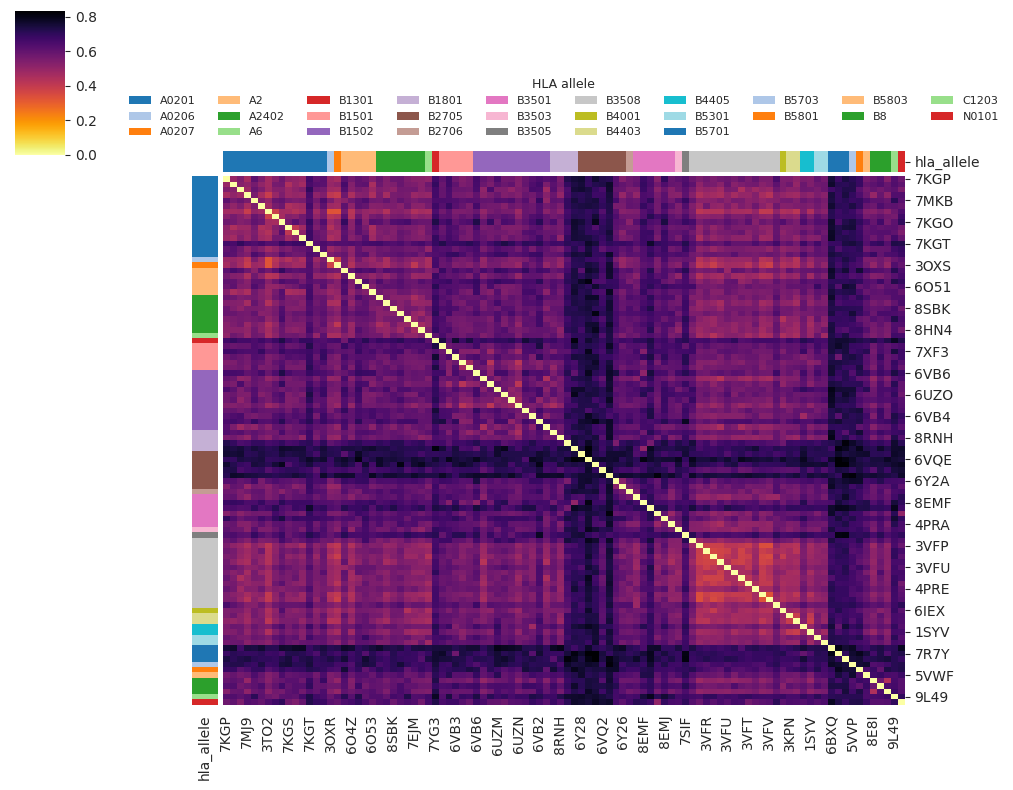

In [ ]:
# -------------------------------------------------------------
# 1 .  Map every PDB to its HLA allele
# -------------------------------------------------------------
# results_meta must contain a column named 'hla_allele' (grab_hla() gave you that).
pdb2hla = (
    results_meta[['pdb_id', 'hla_allele']]
    .dropna()
    .drop_duplicates(subset='pdb_id')
    .set_index('pdb_id')['hla_allele']
)

# fallback label for structures where HLA wasn’t detected
pwm_euclid = pwm_euclid.loc[pdb2hla.index.intersection(pwm_euclid.index)]  # keep only mapped PDBs
pdb2hla = pdb2hla.reindex(pwm_euclid.index).fillna('UNK')

# -------------------------------------------------------------
# 2 .  Re-order the matrix by HLA group, then by PDB
# -------------------------------------------------------------
order = (
    pdb2hla
    .sort_values(kind='mergesort')  # stable: keeps original PDB order within HLA block
    .index
)

M = pwm_js.loc[order, order]            # reordered similarity matrix
hla_order = pdb2hla.loc[order]          # parallel HLA list

# -------------------------------------------------------------
# 3 .  Build stripe colours for the clustermap
# -------------------------------------------------------------
unique_hla = hla_order.unique()
palette    = sns.color_palette('tab20', len(unique_hla))
color_map  = dict(zip(unique_hla, palette))
row_colors = hla_order.map(color_map)

# -------------------------------------------------------------
# 4 .  Draw the heatmap
# -------------------------------------------------------------
g = sns.clustermap(
        M,
        cmap='inferno_r',
        row_cluster=False,
        col_cluster=False,
        row_colors=row_colors,
        col_colors=row_colors,
        linewidths=0.0,  # no tiny grid lines
        figsize=(10, 8)
    )

# -------------------------------------------------------------
# 5 .  Add bold white lines between HLA blocks
# -------------------------------------------------------------
# Find cumulative sizes of each HLA group
group_sizes = hla_order.value_counts(sort=False).loc[unique_hla].values
cuts = np.cumsum(group_sizes)

for cut in cuts[:-1]:                       # skip last cumulative (matrix edge)
    g.ax_heatmap.axhline(cut,  color='white', lw=0)
    g.ax_heatmap.axvline(cut,  color='white', lw=0)

# -------------------------------------------------------------
# 6 .  Pretty titles & legend
# -------------------------------------------------------------
# g.ax_heatmap.set_title('PWM-L1 dissimilarity of peptide sets (grouped by HLA)', pad=16)

# Build a tiny legend for the stripe colours
for hla, col in color_map.items():
    g.ax_col_dendrogram.bar(0, 0, color=col, label=hla, linewidth=0)
g.ax_col_dendrogram.legend(
    loc='lower center',
    ncol=10,
    title='HLA allele',
    frameon=False,
    fontsize=8,
    title_fontsize=9
)

output_dir = '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/figures/'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, f'HLA_MATRIX_EUCLEADIAN.pdf')
plt.savefig(output_path, bbox_inches='tight')

plt.show()

In [ ]:
from scipy.spatial.distance import jensenshannon
from Bio import pairwise2                         # Biopython local-align for unequal lengths

# -----------------------------------------------------------------------------------
# Part A – counts per allele / pLDDT tier
# -----------------------------------------------------------------------------------
# 1. mark confidence tier (your tmp DataFrame)
tmp = (
    results_meta
      .drop_duplicates(subset=['epitope', 'PDB'])
      .assign(conf=lambda d: np.where(d['plddt'] >= 0.8,
                                      'HIGH_PLDDT', 'LOW_PLDDT'))
)

# 2. peptide counts per allele + tier
epi_counts = (tmp.groupby(['hla_allele', 'conf'])
                   .size().reset_index(name='n_epitopes'))

# 3. number of distinct PDBs per allele
struct_counts = (tmp.groupby('hla_allele')['PDB']
                     .nunique()
                     .reset_index()
                     .rename(columns={'PDB': 'n_structures'}))

# 4. merge & pivot into final summary table
allele_summary = (struct_counts
                  .merge(epi_counts, on='hla_allele', how='left')
                  .pivot_table(index=['hla_allele', 'n_structures'],
                               columns='conf',
                               values='n_epitopes',
                               fill_value=0)
                  .reset_index()
                  .sort_values('n_structures', ascending=False))

# 5. save & show
# out_csv = '/global/scratch/users/sergiomar10/ESMCBA/analysis/allele_summary.csv'
# allele_summary.to_csv(out_csv, index=False)
# display(allele_summary.head())


/clusterfs/nilah/sergio/miniconda3/envs/ESM_cambrian/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [ ]:
allele_summary['sum'] = allele_summary['HIGH_PLDDT'].astype(int) + allele_summary['LOW_PLDDT'].astype(int)

In [ ]:
allele_summary

conf,hla_allele,n_structures,HIGH_PLDDT,LOW_PLDDT,sum
0,A0201,15,619.0,17163.0,17782
15,B3508,13,690.0,40004.0,40694
8,B1502,11,153.0,10872.0,11025
4,A2402,7,266.0,6127.0,6393
12,B3501,7,51.0,6838.0,6889
10,B2705,7,29.0,6739.0,6768
3,A2,6,141.0,5574.0,5715
7,B1501,5,67.0,4962.0,5029
9,B1801,4,37.0,3339.0,3376
24,B8,3,128.0,3675.0,3803
